In [1]:
# !pip install geopy

In [2]:
import re
import math
import pandas as pd
import numpy as np
from geopy.geocoders import Nominatim
import folium
from numpy import nan
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import sklearn 
from scipy.stats import chi2_contingency

In [3]:
data = pd.read_csv('Accidental_Drug_Related_Deaths_2012-2021.csv')
my_data = data.copy()

In [4]:
data.head(40)

,Date,Date Type,Age,Sex,Race,Ethnicity,Residence City,Residence County,Residence State,Injury City,...,Xylazine,Gabapentin,Opiate NOS,Heroin/Morph/Codeine,Other Opioid,Any Opioid,Other,ResidenceCityGeo,InjuryCityGeo,DeathCityGeo
0,05/29/2012,Date of death,37.0,Male,Black,NaN,STAMFORD,FAIRFIELD,NaN,STAMFORD,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"STAMFORD, CT\n(41.051924, -73.539475)","STAMFORD, CT\n(41.051924, -73.539475)","CT\n(41.575155, -72.738288)"
1,06/27/2012,Date of death,37.0,Male,White,NaN,NORWICH,NEW LONDON,NaN,NORWICH,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"NORWICH, CT\n(41.524304, -72.075821)","NORWICH, CT\n(41.524304, -72.075821)","Norwich, CT\n(41.524304, -72.075821)"
2,03/24/2014,Date of death,28.0,Male,White,NaN,HEBRON,NaN,NaN,HEBRON,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"HEBRON, CT\n(41.658069, -72.366324)","HEBRON, CT\n(41.658069, -72.366324)","Marlborough, CT\n(41.632043, -72.461309)"
3,12/31/2014,Date of death,26.0,Female,White,NaN,BALTIC,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"BALTIC, CT\n(41.617221, -72.085031)","CT\n(41.575155, -72.738288)","Baltic, CT\n(41.617221, -72.085031)"
4,01/16/2016,Date of death,41.0,Male,White,NaN,SHELTON,FAIRFIELD,CT,SHELTON,...,NaN,NaN,NaN,NaN,NaN,Y,NaN,"SHELTON, CT\n(41.316843, -73.092968)","SHELTON, CT\n(41.316843, -73.092968)","Bridgeport, CT\n(41.179195, -73.189476)"
5,06/13/2017,Date reported,57.0,Male,White,NaN,BLANDFORD,HAMPDEN,MA,ENFIELD,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"ENFIELD, CT\n(41.976501, -72.591985)","Enfield, CT\n(41.976501, -72.591985)"
6,10/20/2015,Date reported,26.0,Male,White,NaN,DANBURY,FAIRFIELD,CT,DANBURY,...,NaN,NaN,NaN,NaN,NaN,Y,NaN,"DANBURY, CT\n(41.393666, -73.451539)","DANBURY, CT\n(41.393666, -73.451539)","Danbury, CT\n(41.393666, -73.451539)"
7,02/02/2017,Date reported,64.0,Male,White,NaN,MILFORD,NEW HAVEN,CT,MILFORD,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"MILFORD, CT\n(41.224276, -73.057564)","MILFORD, CT\n(41.224276, -73.057564)","Milford, CT\n(41.224276, -73.057564)"
8,07/03/2018,Date of death,33.0,Male,NaN,NaN,NaN,NaN,NaN,HARTFORD,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"CT\n(41.575155, -72.738288)","HARTFORD, CT\n(41.765775, -72.673356)","Hartford, CT\n(41.765775, -72.673356)"
9,05/08/2013,Date of death,23.0,Male,White,NaN,BETHEL,FAIRFIELD,NaN,BETHEL,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"BETHEL, CT\n(41.371727, -73.407448)","BETHEL, CT\n(41.371727, -73.407448)","Bethel, CT\n(41.371727, -73.407448)"


# **Data Pre-processing**

1.   Column Removal/dropping

> The first step in data cleaning was the identification and removal of columns that either do not provide any useful information about the data or have a lot of missing values. The following coloumns were thus removed:

> *   Ethnicity
> *   Other Significant Conditions 

> Both of the columns have too less values to provide any significant information about the entire data. Therefore, they were removed





In [5]:
data = data.drop(['Ethnicity', 'Other Significant Conditions '], axis=1)

2. Making latitude and longitude coloumns for Residence, Injury and Death and also filling-in respective in-complete values



> It's important to note that the information for latitude and longitude of each datapoint is stored in the attributes 'ResidenceCityGeo', 'InjuryCityGeo', and 'DeathCityGeo'; however, they are difficult to read. 

> For this, a 6 new coloumns were introduced that store the latitude and longitude for every respective attribute.

> There are however some conditions to cater:


*   If information about city or state is not given but it's respective value in last 3 coloumns is given:
> In this case, we identify and put the respective values to these coloumns







In [6]:
data['Residence lat'] = np.nan
data['Residence long'] = np.nan
data['Injury lat'] = np.nan
data['Injury long'] = np.nan
data['Death lat'] = np.nan
data['Death long'] = np.nan

data.head(40)

,Date,Date Type,Age,Sex,Race,Residence City,Residence County,Residence State,Injury City,Injury County,...,Other,ResidenceCityGeo,InjuryCityGeo,DeathCityGeo,Residence lat,Residence long,Injury lat,Injury long,Death lat,Death long
0,05/29/2012,Date of death,37.0,Male,Black,STAMFORD,FAIRFIELD,NaN,STAMFORD,NaN,...,NaN,"STAMFORD, CT\n(41.051924, -73.539475)","STAMFORD, CT\n(41.051924, -73.539475)","CT\n(41.575155, -72.738288)",NaN,NaN,NaN,NaN,NaN,NaN
1,06/27/2012,Date of death,37.0,Male,White,NORWICH,NEW LONDON,NaN,NORWICH,NaN,...,NaN,"NORWICH, CT\n(41.524304, -72.075821)","NORWICH, CT\n(41.524304, -72.075821)","Norwich, CT\n(41.524304, -72.075821)",NaN,NaN,NaN,NaN,NaN,NaN
2,03/24/2014,Date of death,28.0,Male,White,HEBRON,NaN,NaN,HEBRON,NaN,...,NaN,"HEBRON, CT\n(41.658069, -72.366324)","HEBRON, CT\n(41.658069, -72.366324)","Marlborough, CT\n(41.632043, -72.461309)",NaN,NaN,NaN,NaN,NaN,NaN
3,12/31/2014,Date of death,26.0,Female,White,BALTIC,NaN,NaN,NaN,NaN,...,NaN,"BALTIC, CT\n(41.617221, -72.085031)","CT\n(41.575155, -72.738288)","Baltic, CT\n(41.617221, -72.085031)",NaN,NaN,NaN,NaN,NaN,NaN
4,01/16/2016,Date of death,41.0,Male,White,SHELTON,FAIRFIELD,CT,SHELTON,NaN,...,NaN,"SHELTON, CT\n(41.316843, -73.092968)","SHELTON, CT\n(41.316843, -73.092968)","Bridgeport, CT\n(41.179195, -73.189476)",NaN,NaN,NaN,NaN,NaN,NaN
5,06/13/2017,Date reported,57.0,Male,White,BLANDFORD,HAMPDEN,MA,ENFIELD,HARTFORD,...,NaN,NaN,"ENFIELD, CT\n(41.976501, -72.591985)","Enfield, CT\n(41.976501, -72.591985)",NaN,NaN,NaN,NaN,NaN,NaN
6,10/20/2015,Date reported,26.0,Male,White,DANBURY,FAIRFIELD,CT,DANBURY,NaN,...,NaN,"DANBURY, CT\n(41.393666, -73.451539)","DANBURY, CT\n(41.393666, -73.451539)","Danbury, CT\n(41.393666, -73.451539)",NaN,NaN,NaN,NaN,NaN,NaN
7,02/02/2017,Date reported,64.0,Male,White,MILFORD,NEW HAVEN,CT,MILFORD,NEW HAVEN,...,NaN,"MILFORD, CT\n(41.224276, -73.057564)","MILFORD, CT\n(41.224276, -73.057564)","Milford, CT\n(41.224276, -73.057564)",NaN,NaN,NaN,NaN,NaN,NaN
8,07/03/2018,Date of death,33.0,Male,NaN,NaN,NaN,NaN,HARTFORD,HARTFORD,...,NaN,"CT\n(41.575155, -72.738288)","HARTFORD, CT\n(41.765775, -72.673356)","Hartford, CT\n(41.765775, -72.673356)",NaN,NaN,NaN,NaN,NaN,NaN
9,05/08/2013,Date of death,23.0,Male,White,BETHEL,FAIRFIELD,NaN,BETHEL,NaN,...,NaN,"BETHEL, CT\n(41.371727, -73.407448)","BETHEL, CT\n(41.371727, -73.407448)","Bethel, CT\n(41.371727, -73.407448)",NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
pd.isnull(data['Residence State'][0])

True

In [8]:
for index,rows in data.iterrows():
  temp = rows['ResidenceCityGeo']
  replace_list = []
  if isinstance(temp, str):
    clean_string = temp.replace('\n', ',').replace('(', '').replace(')', '')
    parsed_list = clean_string.split(',')
    parsed_list = [elem.strip() for elem in parsed_list]
    if len(parsed_list) < 4:
      parsed_list.insert(0,np.nan)
  else:
    parsed_list = [np.nan]
  replace_list.append(parsed_list)
  parsed_list = []


  temp = rows['InjuryCityGeo']
  if isinstance(temp, str):
    clean_string = temp.replace('\n', ',').replace('(', '').replace(')', '')
    parsed_list = clean_string.split(',')
    parsed_list = [elem.strip() for elem in parsed_list]
    if len(parsed_list) < 4:
      parsed_list.insert(0,np.nan)
  else:
    parsed_list = [np.nan]
  replace_list.append(parsed_list)
  parsed_list = []

  temp = rows['DeathCityGeo']
  if isinstance(temp, str):
    clean_string = temp.replace('\n', ',').replace('(', '').replace(')', '')
    parsed_list = clean_string.split(',')
    parsed_list = [elem.strip() for elem in parsed_list]
    if len(parsed_list) < 4:
      parsed_list.insert(0,np.nan)
  else:
    parsed_list = [np.nan]
  replace_list.append(parsed_list)
  parsed_list = []

  if len(replace_list[0]) != 1:
    if pd.isnull(rows['Residence City']):
      data['Residence City'][index] = replace_list[0][0]

    if pd.isnull(rows['Residence State']):
      data['Residence State'][index] = replace_list[0][1]

    data['Residence lat'][index] = replace_list[0][2]
    data['Residence long'][index] = replace_list[0][3]



  if len(replace_list[1]) != 1:
    if pd.isnull(rows['Injury City']):
      data['Injury City'][index] = replace_list[1][0]

    if pd.isnull(rows['Injury State']):
      data['Injury State'][index] = replace_list[1][1]

    data['Injury lat'][index] = replace_list[1][2]
    data['Injury long'][index] = replace_list[1][3]

  

  if len(replace_list[2]) != 1:
    if pd.isnull(rows['Death City']):
      data['Death City'][index] = replace_list[2][0]

    if pd.isnull(rows['Death State']):
      data['Death State'][index] = replace_list[2][1]

    data['Death lat'][index] = replace_list[2][2]
    data['Death long'][index] = replace_list[2][3]


  # print(replace_list)

# data['ResidenceCityGeo'].str.split(', |\/|\(|\)', expand=True).head(20)
# data.head(20)
# data = data.drop(['ResidenceCityGeo','InjuryCityGeo','DeathCityGeo'],axis=1)

In [9]:
data.head(40)

,Date,Date Type,Age,Sex,Race,Residence City,Residence County,Residence State,Injury City,Injury County,...,Other,ResidenceCityGeo,InjuryCityGeo,DeathCityGeo,Residence lat,Residence long,Injury lat,Injury long,Death lat,Death long
0,05/29/2012,Date of death,37.0,Male,Black,STAMFORD,FAIRFIELD,CT,STAMFORD,NaN,...,NaN,"STAMFORD, CT\n(41.051924, -73.539475)","STAMFORD, CT\n(41.051924, -73.539475)","CT\n(41.575155, -72.738288)",41.051924,-73.539475,41.051924,-73.539475,41.575155,-72.738288
1,06/27/2012,Date of death,37.0,Male,White,NORWICH,NEW LONDON,CT,NORWICH,NaN,...,NaN,"NORWICH, CT\n(41.524304, -72.075821)","NORWICH, CT\n(41.524304, -72.075821)","Norwich, CT\n(41.524304, -72.075821)",41.524304,-72.075821,41.524304,-72.075821,41.524304,-72.075821
2,03/24/2014,Date of death,28.0,Male,White,HEBRON,NaN,CT,HEBRON,NaN,...,NaN,"HEBRON, CT\n(41.658069, -72.366324)","HEBRON, CT\n(41.658069, -72.366324)","Marlborough, CT\n(41.632043, -72.461309)",41.658069,-72.366324,41.658069,-72.366324,41.632043,-72.461309
3,12/31/2014,Date of death,26.0,Female,White,BALTIC,NaN,CT,NaN,NaN,...,NaN,"BALTIC, CT\n(41.617221, -72.085031)","CT\n(41.575155, -72.738288)","Baltic, CT\n(41.617221, -72.085031)",41.617221,-72.085031,41.575155,-72.738288,41.617221,-72.085031
4,01/16/2016,Date of death,41.0,Male,White,SHELTON,FAIRFIELD,CT,SHELTON,NaN,...,NaN,"SHELTON, CT\n(41.316843, -73.092968)","SHELTON, CT\n(41.316843, -73.092968)","Bridgeport, CT\n(41.179195, -73.189476)",41.316843,-73.092968,41.316843,-73.092968,41.179195,-73.189476
5,06/13/2017,Date reported,57.0,Male,White,BLANDFORD,HAMPDEN,MA,ENFIELD,HARTFORD,...,NaN,NaN,"ENFIELD, CT\n(41.976501, -72.591985)","Enfield, CT\n(41.976501, -72.591985)",NaN,NaN,41.976501,-72.591985,41.976501,-72.591985
6,10/20/2015,Date reported,26.0,Male,White,DANBURY,FAIRFIELD,CT,DANBURY,NaN,...,NaN,"DANBURY, CT\n(41.393666, -73.451539)","DANBURY, CT\n(41.393666, -73.451539)","Danbury, CT\n(41.393666, -73.451539)",41.393666,-73.451539,41.393666,-73.451539,41.393666,-73.451539
7,02/02/2017,Date reported,64.0,Male,White,MILFORD,NEW HAVEN,CT,MILFORD,NEW HAVEN,...,NaN,"MILFORD, CT\n(41.224276, -73.057564)","MILFORD, CT\n(41.224276, -73.057564)","Milford, CT\n(41.224276, -73.057564)",41.224276,-73.057564,41.224276,-73.057564,41.224276,-73.057564
8,07/03/2018,Date of death,33.0,Male,NaN,NaN,NaN,CT,HARTFORD,HARTFORD,...,NaN,"CT\n(41.575155, -72.738288)","HARTFORD, CT\n(41.765775, -72.673356)","Hartford, CT\n(41.765775, -72.673356)",41.575155,-72.738288,41.765775,-72.673356,41.765775,-72.673356
9,05/08/2013,Date of death,23.0,Male,White,BETHEL,FAIRFIELD,CT,BETHEL,NaN,...,NaN,"BETHEL, CT\n(41.371727, -73.407448)","BETHEL, CT\n(41.371727, -73.407448)","Bethel, CT\n(41.371727, -73.407448)",41.371727,-73.407448,41.371727,-73.407448,41.371727,-73.407448


*   If values for city and state are present in the earlier columns but the respective latitude and longitude is NaN
> It has been noted in the data that several data points, especially those with value for state other than 'CT' have geo information NaN. For that, we make use of Nominatim Library and search those locations' coordinates and put them in their respective latitude and longitude columns.

* If both of the values for latitude and longitude and city and state column values are empty
> Then they are left empty to indicate for missing values in the data



In [10]:
geolocator = Nominatim(user_agent="app")

for index, rows in data.iterrows():

  if rows['Residence City'] == 'UNKNOWN':
    data['Residence City'][index] = np.nan
  if rows['Residence State'] == 'UNKNOWN':
    data['Residence State'][index] = np.nan
  if rows['Injury City'] == 'UNKNOWN':
    data['Injury City'][index] = np.nan
  if rows['Injury State'] == 'UNKNOWN':
    data['Injury State'][index] = np.nan
  if rows['Death City'] == 'UNKNOWN':
    data['Death City'][index] = np.nan
  if rows['Death State'] == 'UNKNOWN':
    data['Death State'][index] = np.nan


  if pd.isnull(rows['ResidenceCityGeo']):
    if not (pd.isnull(rows['Residence City']) and (pd.isnull(rows['Residence State']))):
      try:
        location = geolocator.geocode(f"{rows['Residence City']}, {rows['Residence State']}")
        if location:
          data['Residence lat'][index] = location.latitude
          data['Residence long'][index] = location.longitude
      except:
        pass
    elif not (pd.isnull(rows['Residence State'])):
      try:
        location = geolocator.geocode(f"{rows['Residence State']}, {'USA'}")
        if location:
          data['Residence lat'][index] = location.latitude
          data['Residence long'][index] = location.longitude
      except: 
        pass
    elif not (pd.isnull(rows['Residence City'])):
      try:
        location = geolocator.geocode(f"{rows['Residence City']}")
        if location:
          data['Residence lat'][index] = location.latitude
          data['Residence long'][index] = location.longitude
      except:
        pass

  if pd.isnull(rows['InjuryCityGeo']):
    if not (pd.isnull(rows['Injury City']) and (pd.isnull(rows['Injury State']))):
      try:
        location = geolocator.geocode(f"{rows['Injury City']}, {rows['Injury State']}")
        if location:
          data['Injury lat'][index] = location.latitude
          data['Injury long'][index] = location.longitude
      except:
        pass
    elif not (pd.isnull(rows['Injury State'])):
      try:
        location = geolocator.geocode(f"{rows['Injury State']}, {'USA'}")
        if location:
          data['Injury lat'][index] = location.latitude
          data['Injury long'][index] = location.longitude
      except:
        pass
    elif not (pd.isnull(rows['Injury City'])):
      try:
        location = geolocator.geocode(f"{rows['Injury City']}")
        if location:
          data['Injury lat'][index] = location.latitude
          data['Injury long'][index] = location.longitude
      except:
        pass


  if pd.isnull(rows['DeathCityGeo']):
    if not (pd.isnull(rows['Death City']) and (pd.isnull(rows['Death State']))):
      try:
        location = geolocator.geocode(f"{rows['Death City']}, {rows['Death State']}")
        if location:
          data['Death lat'][index] = location.latitude
          data['Death long'][index] = location.longitude
      except:
        pass
    elif not (pd.isnull(rows['Death State'])):
      try:
        location = geolocator.geocode(f"{rows['Death State']}, {'USA'}")
        if location:
          data['Death lat'][index] = location.latitude
          data['Death long'][index] = location.longitude
      except:
        pass
    elif not (pd.isnull(rows['Death City'])):
      try:
        location = geolocator.geocode(f"{rows['Death City']}")
        if location:
          data['Death lat'][index] = location.latitude
          data['Death long'][index] = location.longitude
      except:
        pass

In [11]:
data.head(40)

,Date,Date Type,Age,Sex,Race,Residence City,Residence County,Residence State,Injury City,Injury County,...,Other,ResidenceCityGeo,InjuryCityGeo,DeathCityGeo,Residence lat,Residence long,Injury lat,Injury long,Death lat,Death long
0,05/29/2012,Date of death,37.0,Male,Black,STAMFORD,FAIRFIELD,CT,STAMFORD,NaN,...,NaN,"STAMFORD, CT\n(41.051924, -73.539475)","STAMFORD, CT\n(41.051924, -73.539475)","CT\n(41.575155, -72.738288)",41.051924,-73.539475,41.051924,-73.539475,41.575155,-72.738288
1,06/27/2012,Date of death,37.0,Male,White,NORWICH,NEW LONDON,CT,NORWICH,NaN,...,NaN,"NORWICH, CT\n(41.524304, -72.075821)","NORWICH, CT\n(41.524304, -72.075821)","Norwich, CT\n(41.524304, -72.075821)",41.524304,-72.075821,41.524304,-72.075821,41.524304,-72.075821
2,03/24/2014,Date of death,28.0,Male,White,HEBRON,NaN,CT,HEBRON,NaN,...,NaN,"HEBRON, CT\n(41.658069, -72.366324)","HEBRON, CT\n(41.658069, -72.366324)","Marlborough, CT\n(41.632043, -72.461309)",41.658069,-72.366324,41.658069,-72.366324,41.632043,-72.461309
3,12/31/2014,Date of death,26.0,Female,White,BALTIC,NaN,CT,NaN,NaN,...,NaN,"BALTIC, CT\n(41.617221, -72.085031)","CT\n(41.575155, -72.738288)","Baltic, CT\n(41.617221, -72.085031)",41.617221,-72.085031,41.575155,-72.738288,41.617221,-72.085031
4,01/16/2016,Date of death,41.0,Male,White,SHELTON,FAIRFIELD,CT,SHELTON,NaN,...,NaN,"SHELTON, CT\n(41.316843, -73.092968)","SHELTON, CT\n(41.316843, -73.092968)","Bridgeport, CT\n(41.179195, -73.189476)",41.316843,-73.092968,41.316843,-73.092968,41.179195,-73.189476
5,06/13/2017,Date reported,57.0,Male,White,BLANDFORD,HAMPDEN,MA,ENFIELD,HARTFORD,...,NaN,NaN,"ENFIELD, CT\n(41.976501, -72.591985)","Enfield, CT\n(41.976501, -72.591985)",42.180758,-72.927816,41.976501,-72.591985,41.976501,-72.591985
6,10/20/2015,Date reported,26.0,Male,White,DANBURY,FAIRFIELD,CT,DANBURY,NaN,...,NaN,"DANBURY, CT\n(41.393666, -73.451539)","DANBURY, CT\n(41.393666, -73.451539)","Danbury, CT\n(41.393666, -73.451539)",41.393666,-73.451539,41.393666,-73.451539,41.393666,-73.451539
7,02/02/2017,Date reported,64.0,Male,White,MILFORD,NEW HAVEN,CT,MILFORD,NEW HAVEN,...,NaN,"MILFORD, CT\n(41.224276, -73.057564)","MILFORD, CT\n(41.224276, -73.057564)","Milford, CT\n(41.224276, -73.057564)",41.224276,-73.057564,41.224276,-73.057564,41.224276,-73.057564
8,07/03/2018,Date of death,33.0,Male,NaN,NaN,NaN,CT,HARTFORD,HARTFORD,...,NaN,"CT\n(41.575155, -72.738288)","HARTFORD, CT\n(41.765775, -72.673356)","Hartford, CT\n(41.765775, -72.673356)",41.575155,-72.738288,41.765775,-72.673356,41.765775,-72.673356
9,05/08/2013,Date of death,23.0,Male,White,BETHEL,FAIRFIELD,CT,BETHEL,NaN,...,NaN,"BETHEL, CT\n(41.371727, -73.407448)","BETHEL, CT\n(41.371727, -73.407448)","Bethel, CT\n(41.371727, -73.407448)",41.371727,-73.407448,41.371727,-73.407448,41.371727,-73.407448


3. 'Location if Other' column removed
> Since 'Location if Other' attribute is just an extension of 'Location' attribute, its values were replaced in the 'Location' column and it was removed

In [12]:
for index, rows in data.iterrows():
  if rows['Location'] == 'Other':
    if rows['Location if Other']:
      data['Location'][index] = rows['Location if Other']

data = data.drop(['Location if Other'],axis=1)

4. Some redundencies in data observed and removed
> Some reduncdencies in the 'Other' column were identified and removed, i.e the same drug was misspelled with 2 different spellings.



In [13]:
def convert_cap(name):
    return str(name).capitalize()

data = data.replace({'Morphiine': 'Morphine', 'Morphin': 'Morphine'})
data['Other'] = data['Other'].apply(convert_cap)


5. The 'Other' converted to one-hot dataframe and removed
> The data in the 'Other' coloumn could not be used for visually demonstration or to develop trends in its current form. In order to cater for that, we converted it to one-hot encoded dataframe with NaN and 'Y' values and replaced it in place of 'Other' column.

In [14]:
tempData = data['Other']
tempData = tempData.T
tempData = pd.get_dummies(tempData)
tempData = tempData.drop(['Xylazine'],axis=1)

tempData = tempData.replace({0: np.nan, 1: 'Y'})
data = pd.concat([data.iloc[:, :42], tempData, data.iloc[:, 42:]], axis=1)
data = data.drop(['Other','Nan'],axis=1)


In [15]:
data.head(40)

,Date,Date Type,Age,Sex,Race,Residence City,Residence County,Residence State,Injury City,Injury County,...,Zolpidem,ResidenceCityGeo,InjuryCityGeo,DeathCityGeo,Residence lat,Residence long,Injury lat,Injury long,Death lat,Death long
0,05/29/2012,Date of death,37.0,Male,Black,STAMFORD,FAIRFIELD,CT,STAMFORD,NaN,...,NaN,"STAMFORD, CT\n(41.051924, -73.539475)","STAMFORD, CT\n(41.051924, -73.539475)","CT\n(41.575155, -72.738288)",41.051924,-73.539475,41.051924,-73.539475,41.575155,-72.738288
1,06/27/2012,Date of death,37.0,Male,White,NORWICH,NEW LONDON,CT,NORWICH,NaN,...,NaN,"NORWICH, CT\n(41.524304, -72.075821)","NORWICH, CT\n(41.524304, -72.075821)","Norwich, CT\n(41.524304, -72.075821)",41.524304,-72.075821,41.524304,-72.075821,41.524304,-72.075821
2,03/24/2014,Date of death,28.0,Male,White,HEBRON,NaN,CT,HEBRON,NaN,...,NaN,"HEBRON, CT\n(41.658069, -72.366324)","HEBRON, CT\n(41.658069, -72.366324)","Marlborough, CT\n(41.632043, -72.461309)",41.658069,-72.366324,41.658069,-72.366324,41.632043,-72.461309
3,12/31/2014,Date of death,26.0,Female,White,BALTIC,NaN,CT,NaN,NaN,...,NaN,"BALTIC, CT\n(41.617221, -72.085031)","CT\n(41.575155, -72.738288)","Baltic, CT\n(41.617221, -72.085031)",41.617221,-72.085031,41.575155,-72.738288,41.617221,-72.085031
4,01/16/2016,Date of death,41.0,Male,White,SHELTON,FAIRFIELD,CT,SHELTON,NaN,...,NaN,"SHELTON, CT\n(41.316843, -73.092968)","SHELTON, CT\n(41.316843, -73.092968)","Bridgeport, CT\n(41.179195, -73.189476)",41.316843,-73.092968,41.316843,-73.092968,41.179195,-73.189476
5,06/13/2017,Date reported,57.0,Male,White,BLANDFORD,HAMPDEN,MA,ENFIELD,HARTFORD,...,NaN,NaN,"ENFIELD, CT\n(41.976501, -72.591985)","Enfield, CT\n(41.976501, -72.591985)",42.180758,-72.927816,41.976501,-72.591985,41.976501,-72.591985
6,10/20/2015,Date reported,26.0,Male,White,DANBURY,FAIRFIELD,CT,DANBURY,NaN,...,NaN,"DANBURY, CT\n(41.393666, -73.451539)","DANBURY, CT\n(41.393666, -73.451539)","Danbury, CT\n(41.393666, -73.451539)",41.393666,-73.451539,41.393666,-73.451539,41.393666,-73.451539
7,02/02/2017,Date reported,64.0,Male,White,MILFORD,NEW HAVEN,CT,MILFORD,NEW HAVEN,...,NaN,"MILFORD, CT\n(41.224276, -73.057564)","MILFORD, CT\n(41.224276, -73.057564)","Milford, CT\n(41.224276, -73.057564)",41.224276,-73.057564,41.224276,-73.057564,41.224276,-73.057564
8,07/03/2018,Date of death,33.0,Male,NaN,NaN,NaN,CT,HARTFORD,HARTFORD,...,NaN,"CT\n(41.575155, -72.738288)","HARTFORD, CT\n(41.765775, -72.673356)","Hartford, CT\n(41.765775, -72.673356)",41.575155,-72.738288,41.765775,-72.673356,41.765775,-72.673356
9,05/08/2013,Date of death,23.0,Male,White,BETHEL,FAIRFIELD,CT,BETHEL,NaN,...,NaN,"BETHEL, CT\n(41.371727, -73.407448)","BETHEL, CT\n(41.371727, -73.407448)","Bethel, CT\n(41.371727, -73.407448)",41.371727,-73.407448,41.371727,-73.407448,41.371727,-73.407448


As part of the EDA, we print out all the unique values of each column to get an in depth view into the dataframe

In [16]:
for col in data.columns:
    print(f"{col}-->> {data[col].unique()}")

Date-->> ['05/29/2012' '06/27/2012' '03/24/2014' ... '12/31/2021' '09/21/2021'
 '03/15/2021']
Date Type-->> ['Date of death' 'Date reported']
Age-->> [37. 28. 26. 41. 57. 64. 33. 23. 54. 45. 21. 48. 30. 49. 39. 44. 42. 43.
 46. 50. 35. 14. 31. 40. 68. 47. 51. 65. 52. 25. 59. 27. 34. 38. 53. 56.
 24. 36. 22. 63. 70. 60. 29. 32. 55. 61. 67. 19. 58. 66. 62. 20. 18. 69.
 73. 72. 71. 16. 74. 17. 77. nan 84. 75. 80. 81. 15. 78. 87.]
Sex-->> ['Male' 'Female' nan]
Race-->> ['Black' 'White' nan 'Other' 'Unknown' 'Asian Indian'
 'Black or African American' 'American Indian or Alaska Native'
 'Asian, Other' 'Other Asian' 'Hawaiian' 'Native American, Other'
 'Chinese' 'Korean']
Residence City-->> ['STAMFORD' 'NORWICH' 'HEBRON' 'BALTIC' 'SHELTON' 'BLANDFORD' 'DANBURY'
 'MILFORD' nan 'BETHEL' 'MERIDEN' 'MANSFIELD' 'IVORYTON' 'BETHANY'
 'ENFIELD' 'SANDY HOOK' 'BRISTOL' 'WATERFORD' 'SUFFOLK' 'STRATFORD'
 'NEW HAVEN' 'ATHOL' 'NEW BRITAIN' 'BROAD BROOK' 'NEW FAIRFIELD'
 'GREENWICH' 'GRISWOLD' 'WETHERSFI

There are a little inconsistoncies with some values in the dataframe, we manually spotted them and made them coherent

In [17]:
data = data.replace({'accident': 'Accident', 'ACCIDENT': 'Accident', 'UNKNOWN' : np.nan, 'Unknown':np.nan})

# GeoSpatial Analysis

We will be finding out the location with the most number of deaths by plotting the latitude and longitude extracted from the preprocessing done in the previous steps. This will give us insight into which of the cities have the most number of overdoses which lead to death and therefore increase the assistance required in those areas. 

We first convert the values to float type in order for them to be used as numeric values for the geospatial analysis.

NOTE: Map is in a seperate HTML file

In [18]:
data['Death lat'] = data['Death lat'].astype(float)
data['Death long'] = data['Death long'].astype(float)

max_lat=max(data['Death lat'])
min_lat=min(data['Death lat'])
max_lon=max(data['Death long'])
min_lon=min(data['Death long'])


mapp = folium.Map(location=[(max_lat + min_lat)/2,(max_lon+min_lon)/2], zoom_start=5)
for i, prop in data.iterrows():
    folium.Marker([prop['Death lat'], prop['Death long']], popup=prop['Death City']).add_to(mapp)
mapp.save('Deaths_project.html')

# Correlation Analysis
Now we will find the numerical correlation of all the attributes with each other using an sns heatmap to find out which of the columns are closely related with each other.

                  Age  Injury long  Death lat  Death long
Age          1.000000     0.016159  -0.022936   -0.016906
Injury long  0.016159     1.000000   0.005165    0.002139
Death lat   -0.022936     0.005165   1.000000    0.437734
Death long  -0.016906     0.002139   0.437734    1.000000


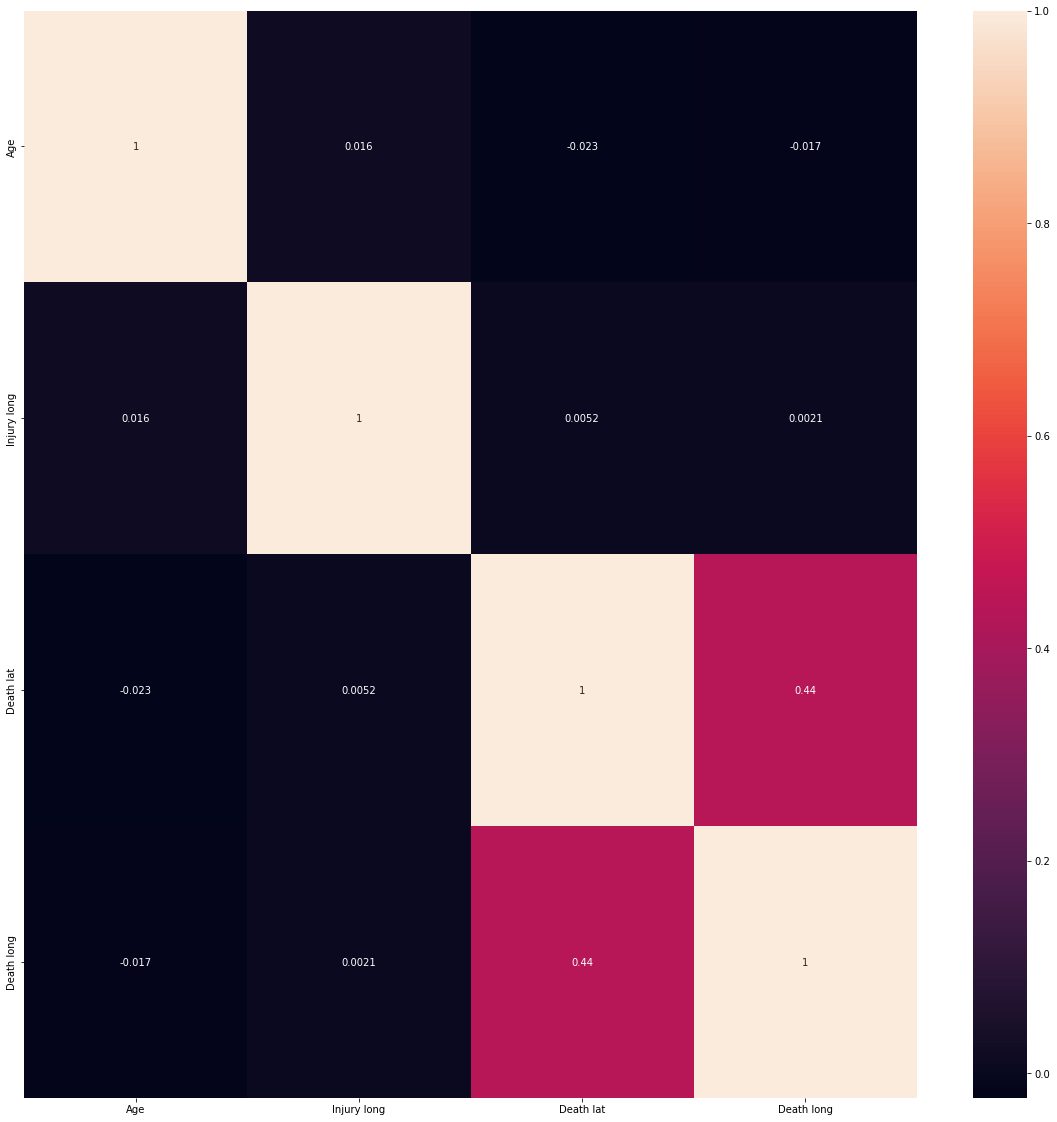

In [19]:
#data['Injury lat'] = data['Injury lat'].astype(float)
data['Injury long'] = data['Injury long'].astype(float)

data['Age'] = data['Age'].astype(float)
corr = data.corr()
print(corr)
plt.rcParams["figure.figsize"] = (20,20)

sns.heatmap(corr, xticklabels=corr.columns,yticklabels=corr.columns,annot=True)
plt.show()

There is a high correlation between death latitude and longitude. The rest of the correlations are pretty low. A correlation analysis is not very efficient in this case since most of the data consists of categorical variables rather than numerical variables and correaltion is only feasible with numerical values. A more suitable measure for categorigal variables is the Chi Square test


# Chi Square 
All the columns are compared with each other and their chi2 values are computed. Since, only the columns with less than equal to 0.05 p value are considered statistically significant, thus only their chi2 and p-values are printed

In [134]:
df2 = data

    
correl = {}

for name in df2:
        
    for name2 in df2:
        if name == name2 or len(name) == 0 or len(name2) == 0 or name == 'Date Type' or name2 == 'Date Type' or name == 'Date' or name2 == 'Date' or name == 'Injury lat' or name2 == 'Injury lat' or name == 'Injury long' or name2 == 'Injury long' or name == 'Death lat' or name2 == 'Death lat' or name == 'Death long' or name2 == 'Death long' or name == 'Residence lat' or name2 == 'Residence lat' or name == 'Residence long' or name2 == 'Residence long':
            continue
        
        ctab = pd.crosstab(df2[name], df2[name2])
        if len(ctab) == 0:
            continue
        chi2, p, dof, expected = chi2_contingency(ctab)
        
        if p <= 0.05 and p != 0.0:
            print("Columns: ", name, name2)
            print("Chi square test: ", chi2, "\tp-value: ", p,"\n")

Columns:  Age Sex
Chi square test:  119.76839477137426 	p-value:  7.963568806119541e-05 

Columns:  Age Injury City
Chi square test:  20856.350579060054 	p-value:  3.279125897153542e-16 

Columns:  Age Description of Injury
Chi square test:  37413.43931640389 	p-value:  1.1011016301436385e-267 

Columns:  Age Fentanyl
Chi square test:  356.7411970636525 	p-value:  6.343451743527253e-24 

Columns:  Age Morphine (Not Heroin)
Chi square test:  121.96739130434784 	p-value:  0.0022150447211259673 

Columns:  Age Any Opioid
Chi square test:  127.73136536205057 	p-value:  5.585931465520687e-06 

Columns:  Age ResidenceCityGeo
Chi square test:  23624.570131809338 	p-value:  0.04132627086131544 

Columns:  Age InjuryCityGeo
Chi square test:  20177.100910416415 	p-value:  1.7830663866948695e-20 

Columns:  Sex Age
Chi square test:  119.76839477137426 	p-value:  7.963568806119541e-05 

Columns:  Sex Injury Place
Chi square test:  115.41150814259053 	p-value:  0.03138295158177802 

Columns:  Sex D

# Box plots
The first one is a box plot of the age grouped by the Death county. This will give us insight into the five number summary of the age statistics of all overdosers grouped by county. 

The second box plot is of the Death longitude grouped by Death county. This will give us insight into the five number summary of the death longitude statistics of all overdosers grouped by county. 

The third box plot is of the Death latitude grouped by Death county. This will give us insight into the five number summary of the death latitude statistics of all overdosers grouped by county. 

<Figure size 1440x2160 with 0 Axes>

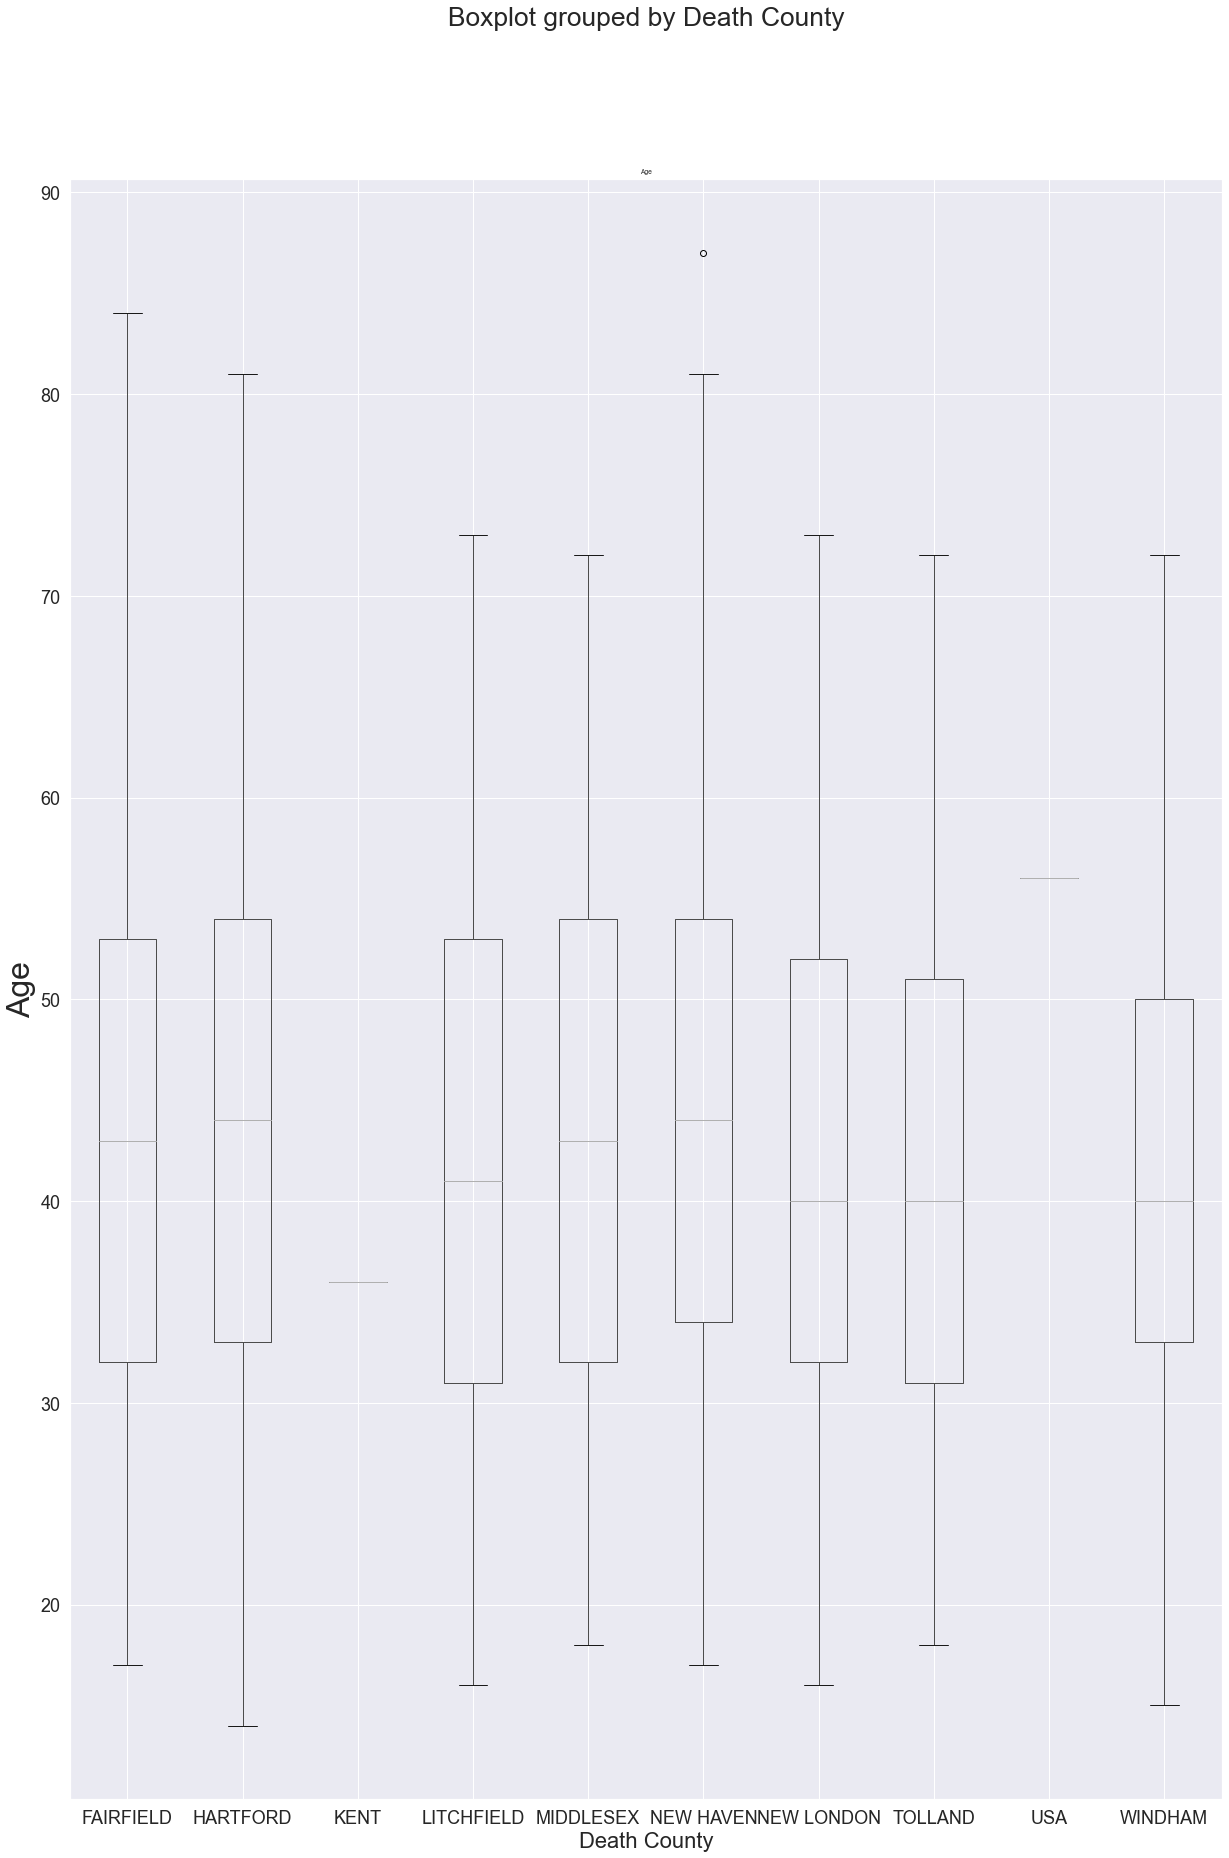

In [142]:
import matplotlib.pyplot as plt

plt.figure()
bp = data.boxplot(column='Age', by=['Death County'])
plt.rcParams["figure.figsize"] = (20,30)
plt.rcParams.update({'font.size': 22})  # Set font size to 22

# Set font size for x-axis and y-axis labels
bp.set_xlabel('Death County', fontsize=22)
bp.set_ylabel('Age', fontsize=32)

# Set font size for x-axis and y-axis tick labels
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)

plt.show()



# plt.figure()
# data.boxplot(column='Age',by=['Fentanyl'])
# plt.rcParams["figure.figsize"] = (20,30)
# plt.show()

# plt.figure()
# data.boxplot(column='Death long',by=['Death County'])
# plt.rcParams["figure.figsize"] = (20,30)
# plt.show()


# plt.figure()
# data.boxplot(column='Death lat',by=['Death County'])
# plt.rcParams["figure.figsize"] = (20,30)
# plt.show()


# Most frequent incident
An interesting insight would be to find the most frequent type of incident in these drug overdoses. To do this, we first grouped the database by description of injury. Now since these values were very sparse we filtered the values to only those which were greater than 50 to make the bar chart more readable. Next, we plotted a bar plot using these values

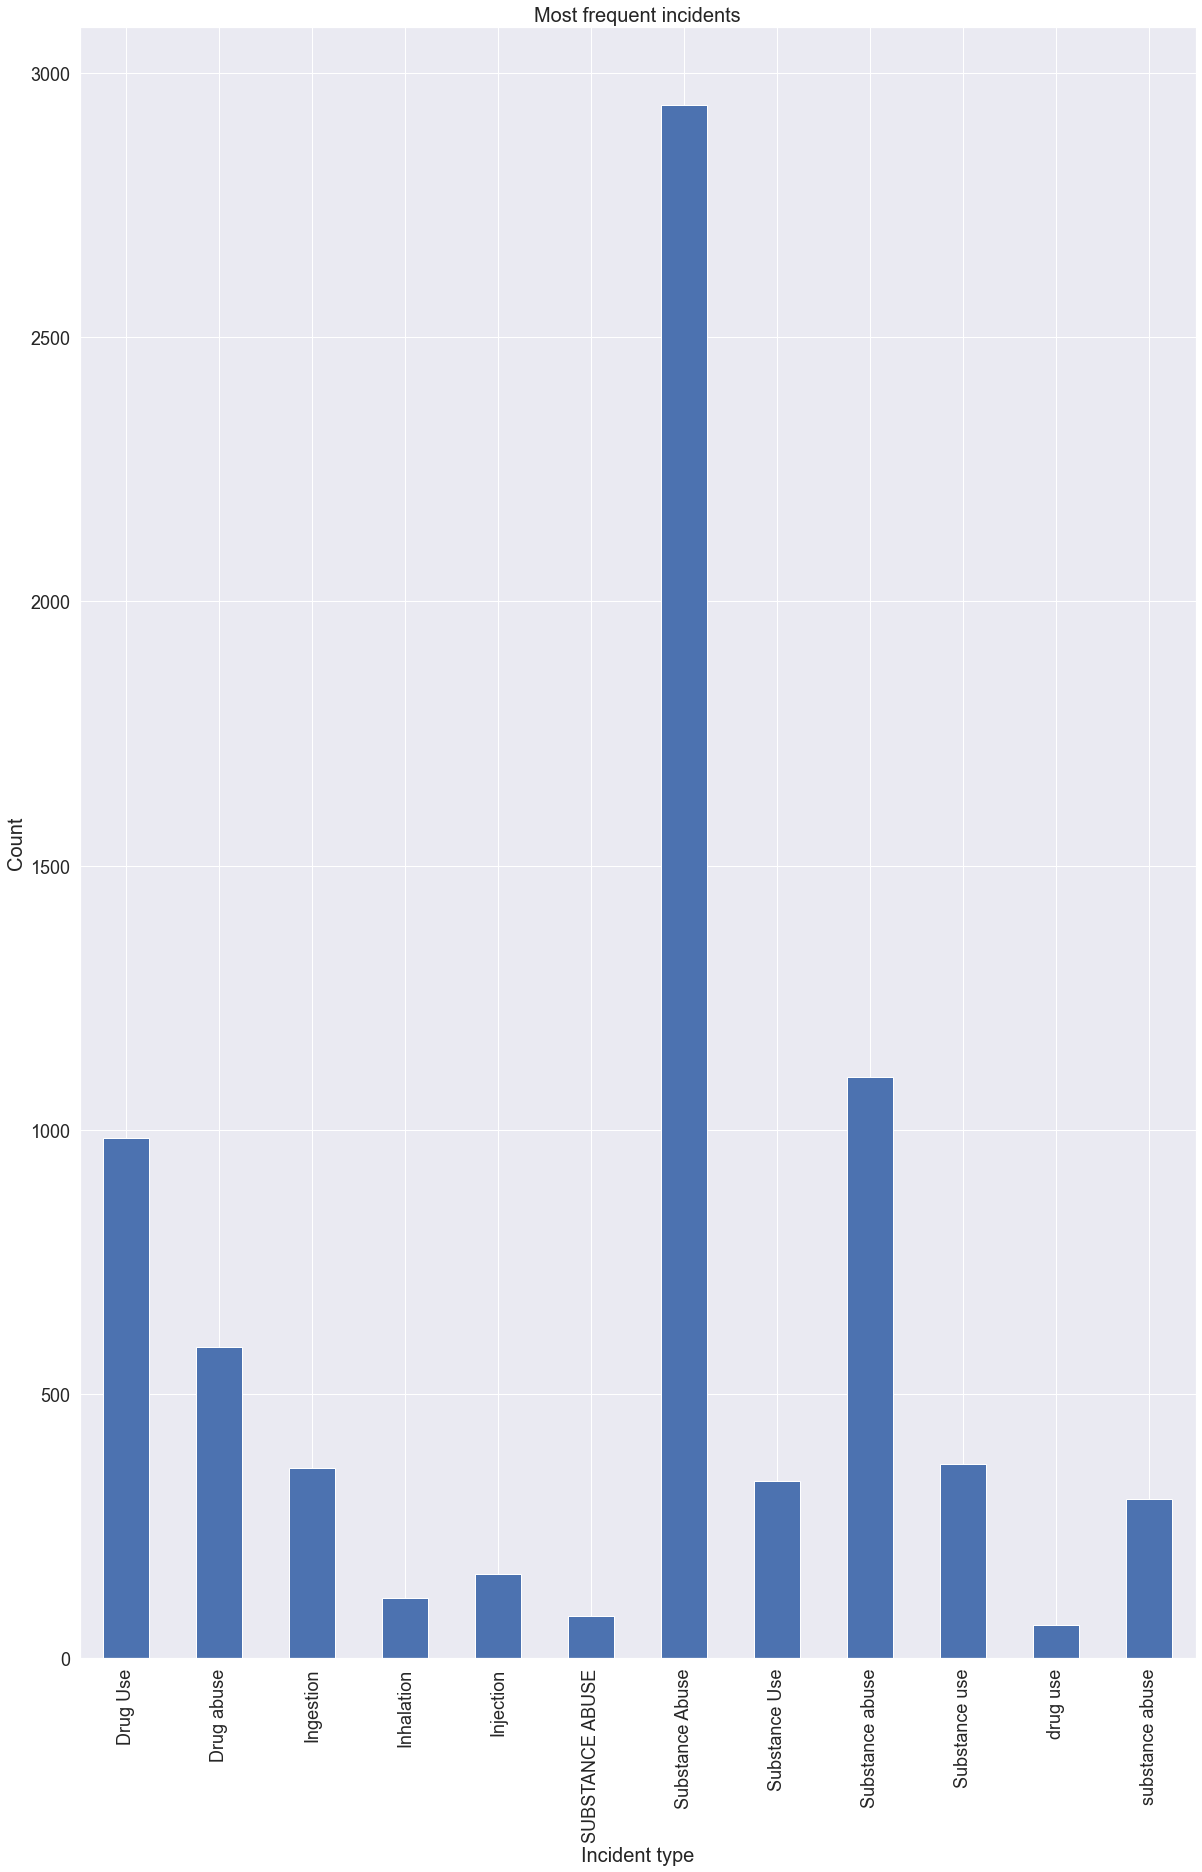

In [143]:
grouped = data.groupby(by='Description of Injury').size()
grouped = grouped.loc[lambda x : x > 50]
grouped.plot(kind='bar')
plt.title("Most frequent incidents", fontsize=20)
plt.xlabel("Incident type", fontsize=20)
plt.ylabel("Count", fontsize=20)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.show()



# Most frequent County/District with deaths
To find this insight, we first grouped the database by death county. Now since these values were very sparse we filtered the values to only those which were greater than 50 to make the bar chart more readable. Next, we plotted a bar plot using these values

Death County
FAIRFIELD     1278
HARTFORD      2441
LITCHFIELD     418
MIDDLESEX      334
NEW HAVEN     2406
NEW LONDON     726
TOLLAND        203
WINDHAM        282
dtype: int64


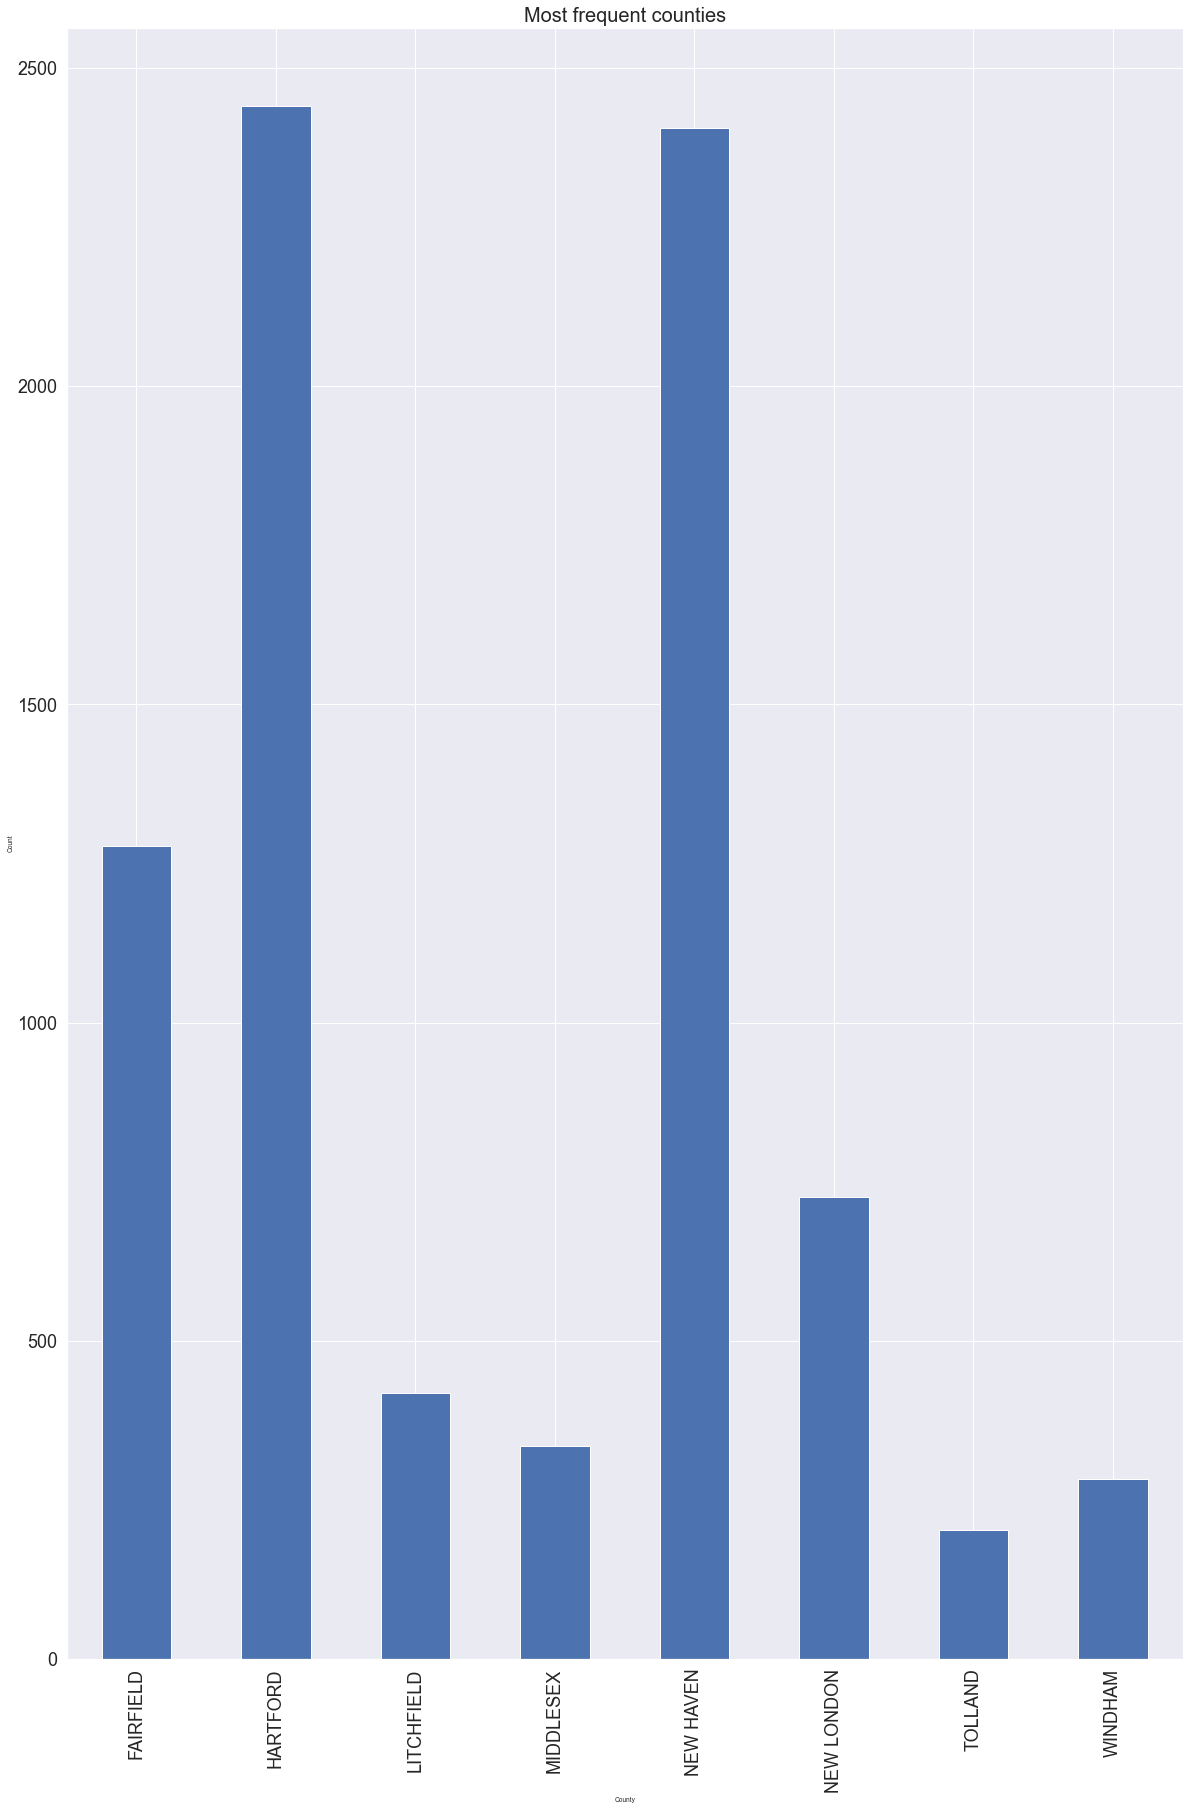

In [144]:
grouped = data.groupby(by='Death County').size()
grouped = grouped.loc[lambda x : x > 50]
print(grouped)
grouped.plot(kind='bar')
plt.title("Most frequent counties", fontsize = 20)
plt.xlabel("County")
plt.ylabel("Count")
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.show()

# Time series analysis 
Printing Number of deaths by Month

> The number of deaths for each Month are amalgamated and a line plot is printed to visualize the trend of the numbe of deaths have occured each year.

[('01', 697), ('02', 689), ('03', 740), ('04', 730), ('05', 780), ('06', 823), ('07', 841), ('08', 771), ('09', 760), ('10', 750), ('11', 810), ('12', 811)]


Text(0.5, 1.0, 'Number of deaths against every Months')

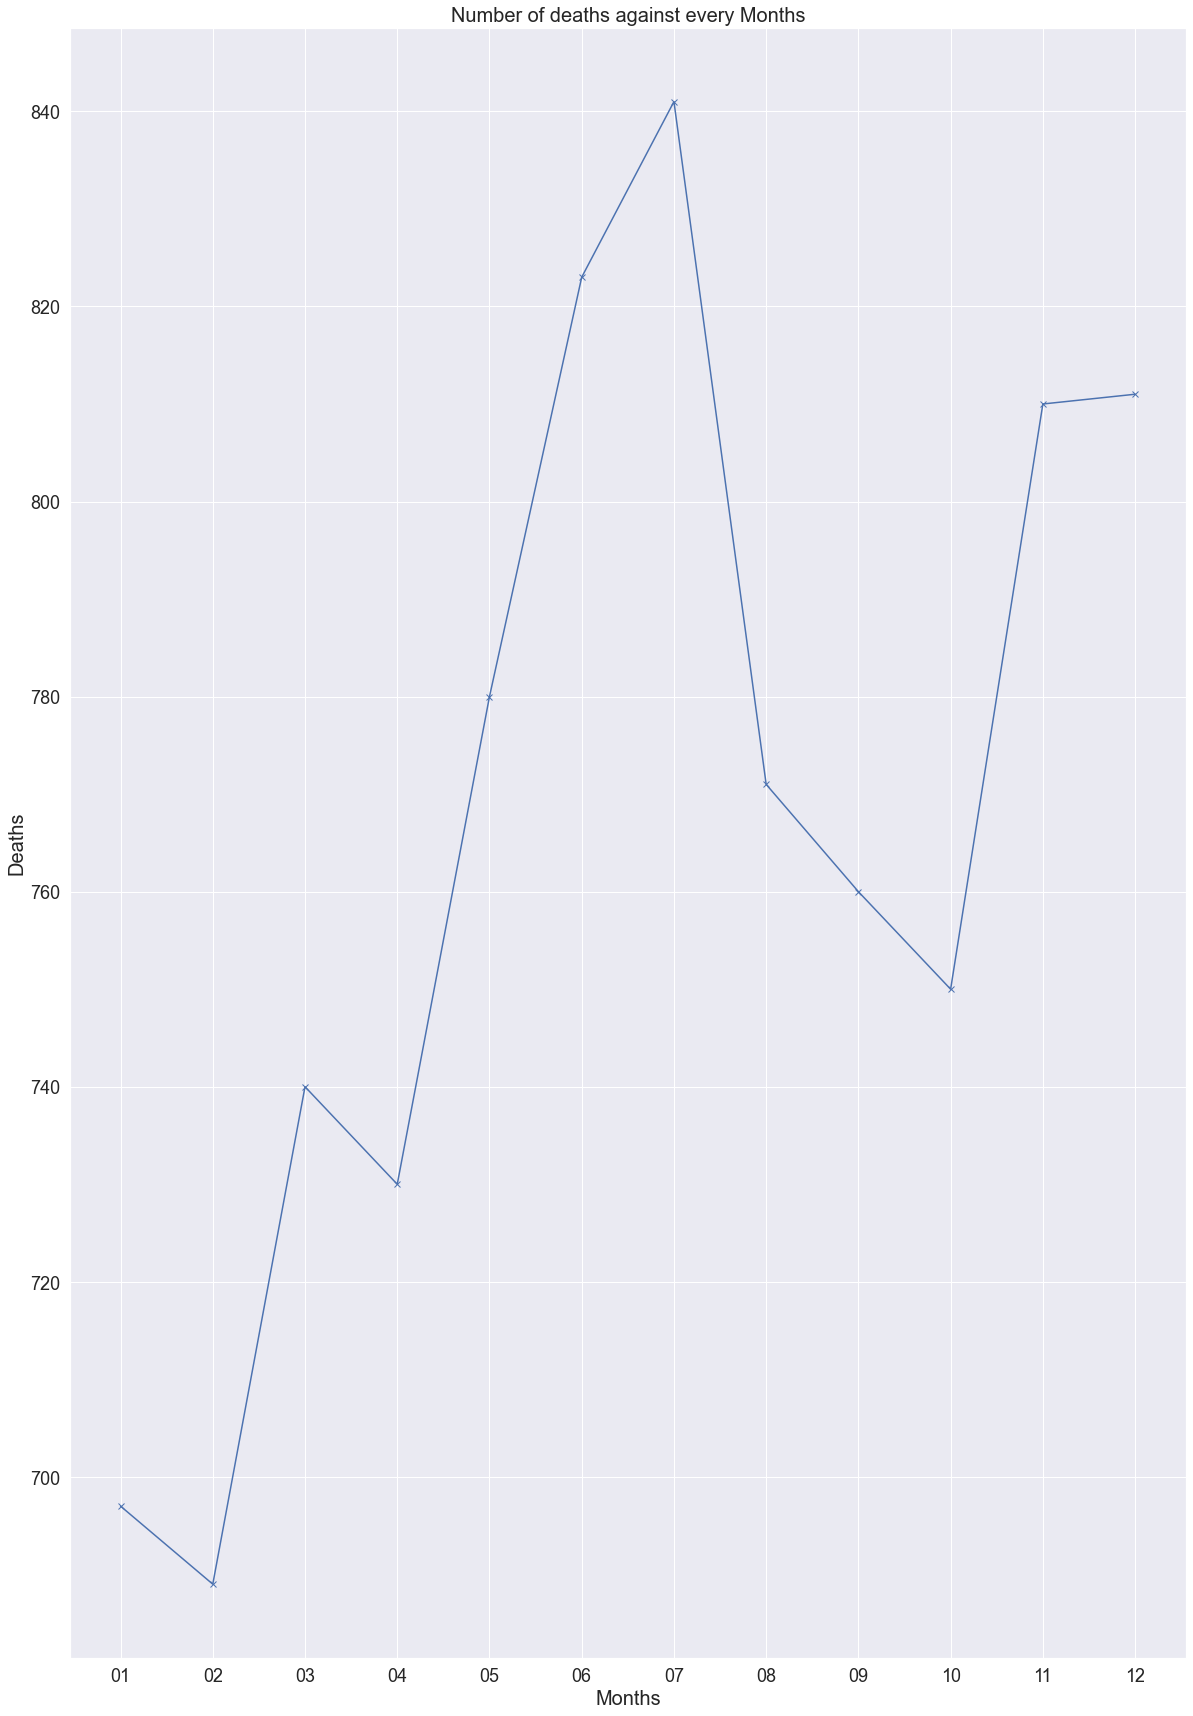

In [146]:
data["Date"][0][:2]

counts = {}
for i in range(len(data)):
    year = data["Date"][i][:2]
    if year in counts.keys():
        counts[year] += 1
    else: 
        counts[year] = 1 

values = counts

values = sorted(values.items(), key=lambda x:x[0])

print(values)

months, deaths = [], []

for tuple in values: 
    months.append(tuple[0])
    deaths.append(tuple[1])
    
plt.plot(months, deaths, "x-b")
plt.xlabel("Months", fontsize =20)
plt.ylabel("Deaths", fontsize =20)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.title("Number of deaths against every Months", fontsize=20)

Analysis: The number of deaths overall increases linearly every month until July, where it peaks, then has a subtle fall till November, but rises again till December.

Printing Number of deaths by Year

> The number of deaths for each year are amalgamated and a line plot is printed to visualize how many deaths have occured each year.

Text(0.5, 1.0, 'Number of deaths against every year')

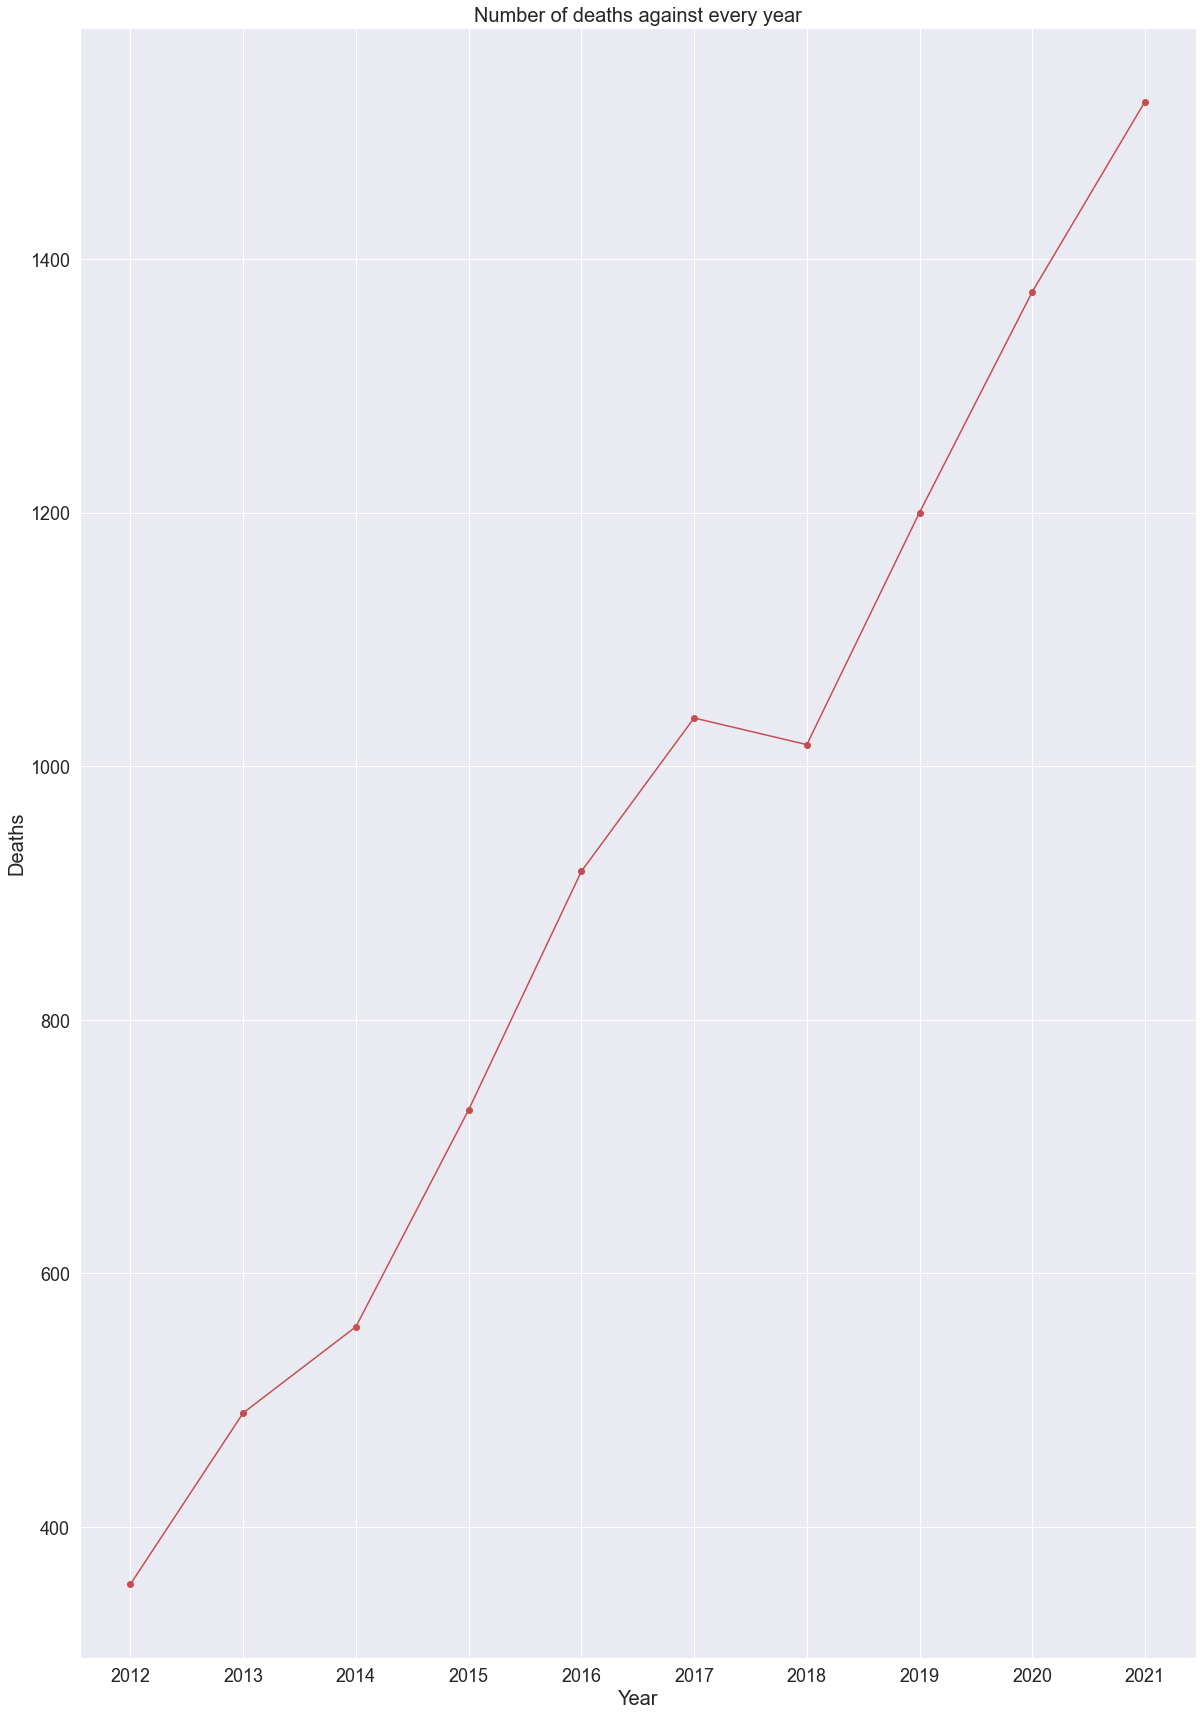

In [147]:
data["Date"][0][-4:]

counts = {}
for i in range(len(data)):
    year = data["Date"][i][-4:]
    if year in counts.keys():
        counts[year] += 1
    else: 
        counts[year] = 1 
        
values = counts
values = sorted(values.items(), key=lambda x:x[0])

year, deaths = [], []

for tuple in values: 
    year.append(tuple[0])
    deaths.append(tuple[1])
    
plt.plot(year, deaths, "o-r")
plt.xlabel("Year", fontsize=20)
plt.ylabel("Deaths", fontsize=20)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.title("Number of deaths against every year", fontsize=20)

Analysis: The graph depicts a more or less linear growth in number of deaths as the number of years increases, with the lowest being in 2012 and the highest being in 2021

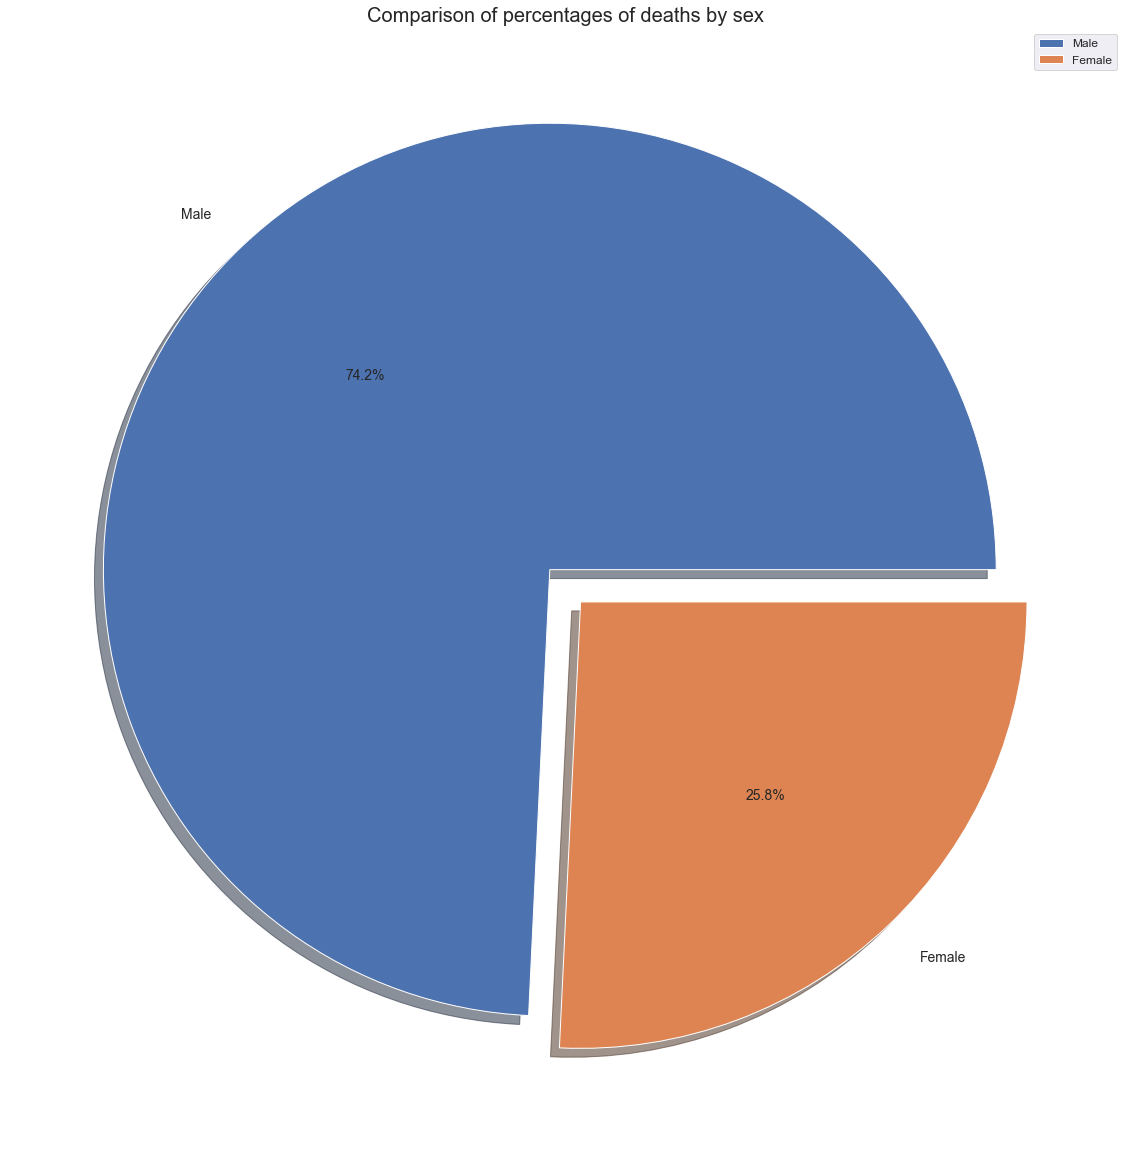

In [130]:
count, name = [], []

for sex in data["Sex"].unique():
    if str(sex) != "nan":
        name.append(sex)
        count.append(len(data[data["Sex"] == sex]))
        
plt.pie(count, labels=name, autopct='%1.1f%%', textprops={'fontsize': 14}, shadow=True, explode=[0.05, 0.05])
plt.title("Comparison of percentages of deaths by sex", fontsize=20)
plt.legend(fontsize=12)
plt.show()


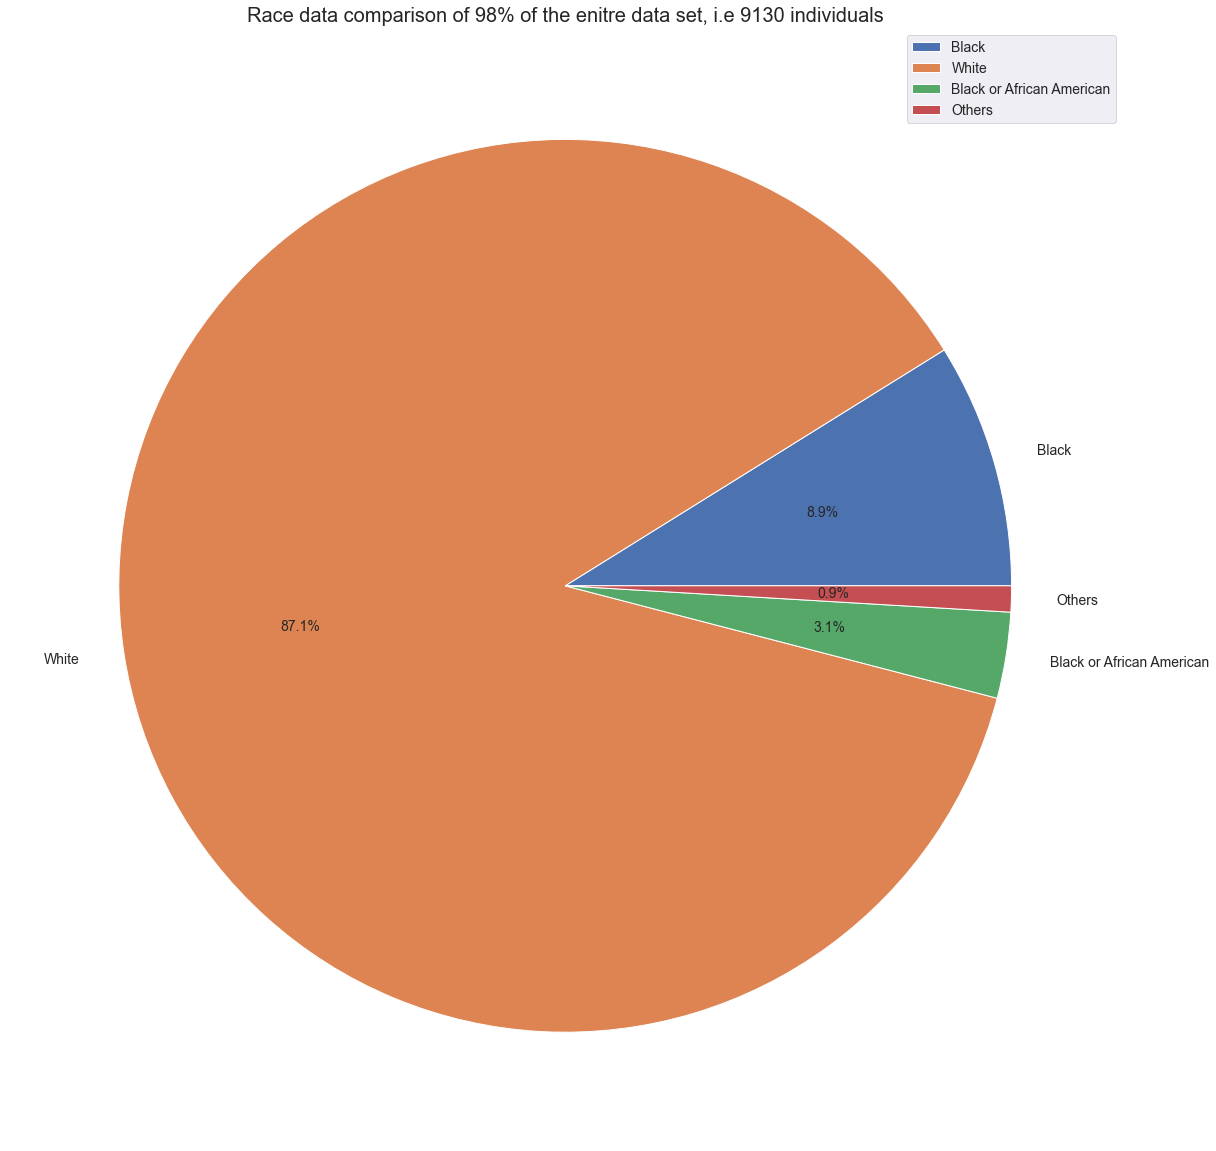

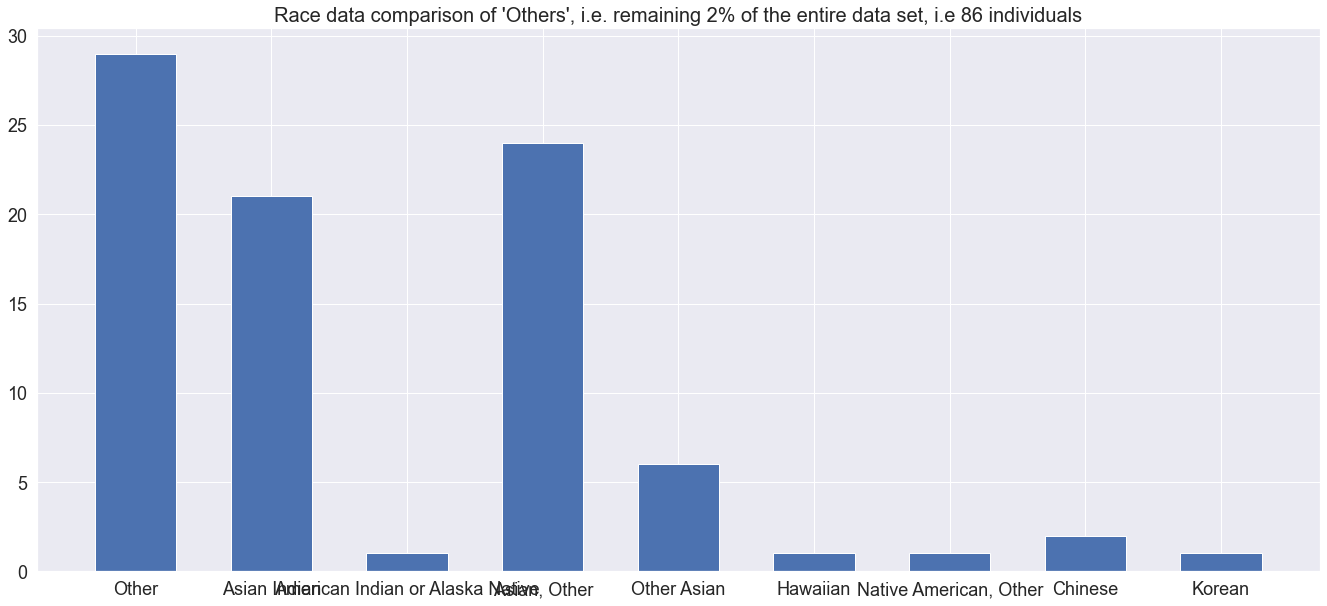

In [154]:
count, name, others, othernames = [], [], [], []

accumulated = 0

total = len(data['Race'])
#Setting threshold value to 2%
threshold = 0.02 * total

for race in data["Race"].unique():
    if str(race) != "nan":
        cnt = len(data[data["Race"] == race])
        
        # Filtering out the races that donot meet the threshold value
        if cnt >= threshold:  
            count.append(cnt)
            name.append(race)
        
        else:
            accumulated += cnt
            others.append(cnt)
            othernames.append(race)

count.append(accumulated)
name.append("Others")

# plt.pie(count, labels=name, autopct='%1.1f%%', textprops={'fontsize': 14}, shadow=True, explode=[0.05, 0.05])
plt.pie(count, labels = name, autopct='%1.1f%%', shadow = False, textprops={'fontsize': 14})
plt.title("Race data comparison of 98% of the enitre data set, i.e " + str(sum(count)) + " individuals", fontsize = 20)
plt.legend(fontsize=14)
plt.show()

# plt.pie(others, labels = othernames, autopct='%1.1f%%', shadow = True)
# plt.title("These populations combined formulate the remaining 2% of the entire data set, i.e " + str(sum(others)) + " individuals")
# plt.show()

# Printing bar plot for the remaining population since pie chart doesn't give visually correct notion
plt.figure(figsize=(23, 10))
plt.bar(othernames,others,align='center', width=0.6)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.title("Race data comparison of 'Others', i.e. remaining 2% of the entire data set, i.e " + str(sum(others)) + " individuals", fontsize = 20)
plt.show()



In [98]:
# data.head(10)

# select the column you want to move from df2
column_to_move = data['Sex']

# concatenate df1 and the selected column from df2
newest_df = pd.concat([column_to_move, new_drug_df], axis=1)
# print(new_df)

# split the dataframe based on the "sex" column
grouped = newest_df.groupby('Sex')

# create separate dataframes for males and females
males = grouped.get_group('Male')
females = grouped.get_group('Female')

male_column_sums = males.sum(axis=0)
female_column_sums = females.sum(axis=0)
new_male = male_column_sums.drop(labels='Sex')
new_female = female_column_sums.drop(labels='Sex')


# print(new_male)
# print(new_female)

In [104]:
male_dct = new_male.to_dict()

drugs = list(male_dct.keys())
death_vals = list(male_dct.values())

total_deaths = sum(death_vals)

for i in range(len(drugs)):
    print("Percentage of deceased males who used", drugs[i],": ",(death_vals[i]/total_deaths)*100)

Percentage of deceased males who used Heroin :  12.099874924723213
Percentage of deceased males who used Cocaine :  10.964932598323065
Percentage of deceased males who used Fentanyl :  20.364108027979803
Percentage of deceased males who used Fentanyl Analogue :  2.5941538889146245
Percentage of deceased males who used Oxycodone :  2.7192291657015795
Percentage of deceased males who used Oxymorphone :  0.4493445129012832
Percentage of deceased males who used Ethanol :  8.968360587390558
Percentage of deceased males who used Hydrocodone :  0.4169175892898504
Percentage of deceased males who used Benzodiazepine :  6.638254505026173
Percentage of deceased males who used Methadone :  2.422754435539908
Percentage of deceased males who used Meth/Amphetamine :  0.45860934821883537
Percentage of deceased males who used Amphet :  0.8708945198499096
Percentage of deceased males who used Tramad :  0.8384675962384769
Percentage of deceased males who used Hydromorphone :  0.15750220039838791
Percent

In [105]:
femlae_dct = new_female.to_dict()

drugs = list(femlae_dct.keys())
death_vals = list(femlae_dct.values())

total_deaths = sum(death_vals)

for i in range(len(drugs)):
    print("Percentage of deceased females who used", drugs[i],": ",(death_vals[i]/total_deaths)*100)

Percentage of deceased females who used Heroin :  9.989112683723462
Percentage of deceased females who used Cocaine :  10.914534567229179
Percentage of deceased females who used Fentanyl :  17.27000544365814
Percentage of deceased females who used Fentanyl Analogue :  2.272727272727273
Percentage of deceased females who used Oxycodone :  3.9466521502449647
Percentage of deceased females who used Oxymorphone :  0.6940664126292868
Percentage of deceased females who used Ethanol :  7.226456178551986
Percentage of deceased females who used Hydrocodone :  0.8709853021230267
Percentage of deceased females who used Benzodiazepine :  10.914534567229179
Percentage of deceased females who used Methadone :  3.960261295590637
Percentage of deceased females who used Meth/Amphetamine :  0.38105606967882416
Percentage of deceased females who used Amphet :  1.3200870985302122
Percentage of deceased females who used Tramad :  1.0479041916167664
Percentage of deceased females who used Hydromorphone :  0

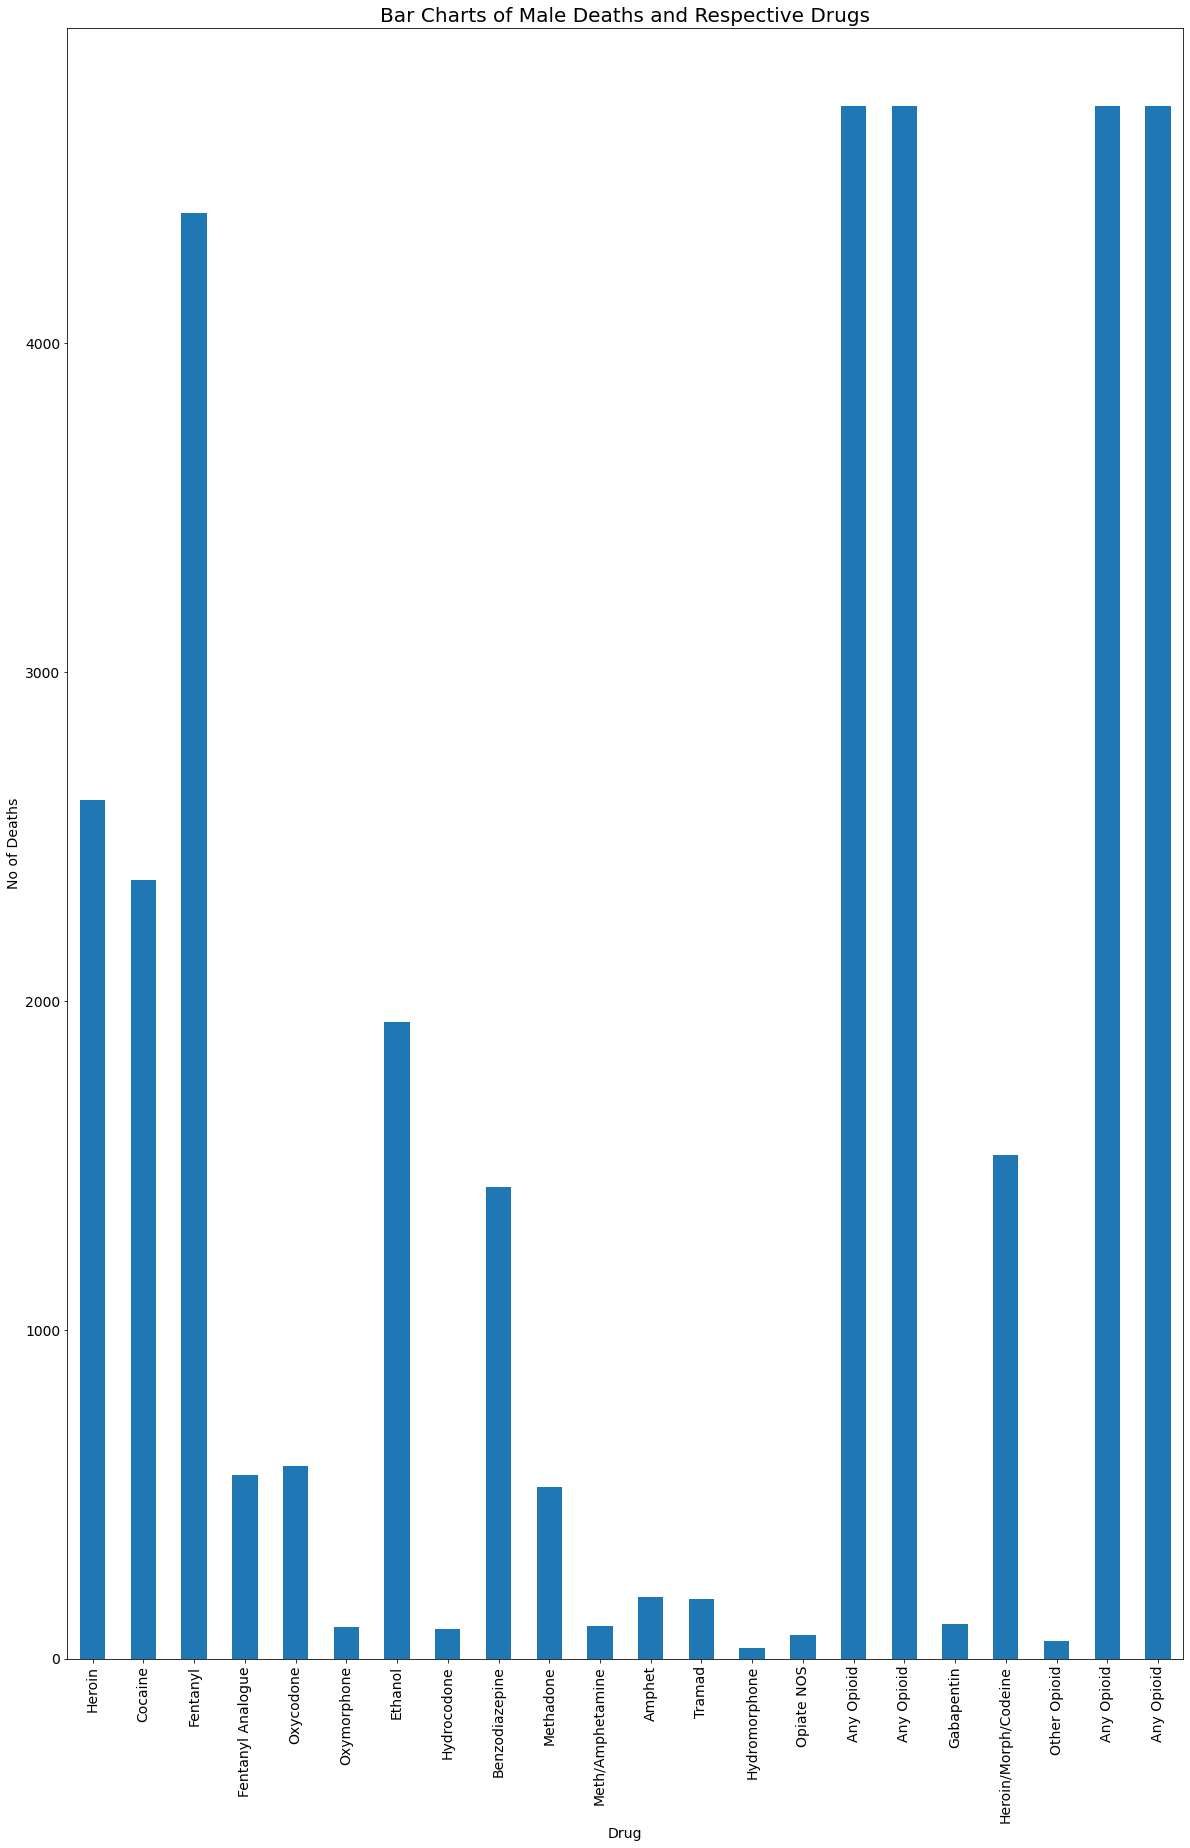

In [38]:
new_male.plot(kind='bar', fontsize = 14)

# add x and y axis labels
plt.xlabel('Drug', fontsize = 14)
plt.ylabel('No of Deaths', fontsize = 14)
plt.title("Bar Charts of Number of Male Deaths and Respective Drugs", fontsize = 20)

# show the plot
plt.show()

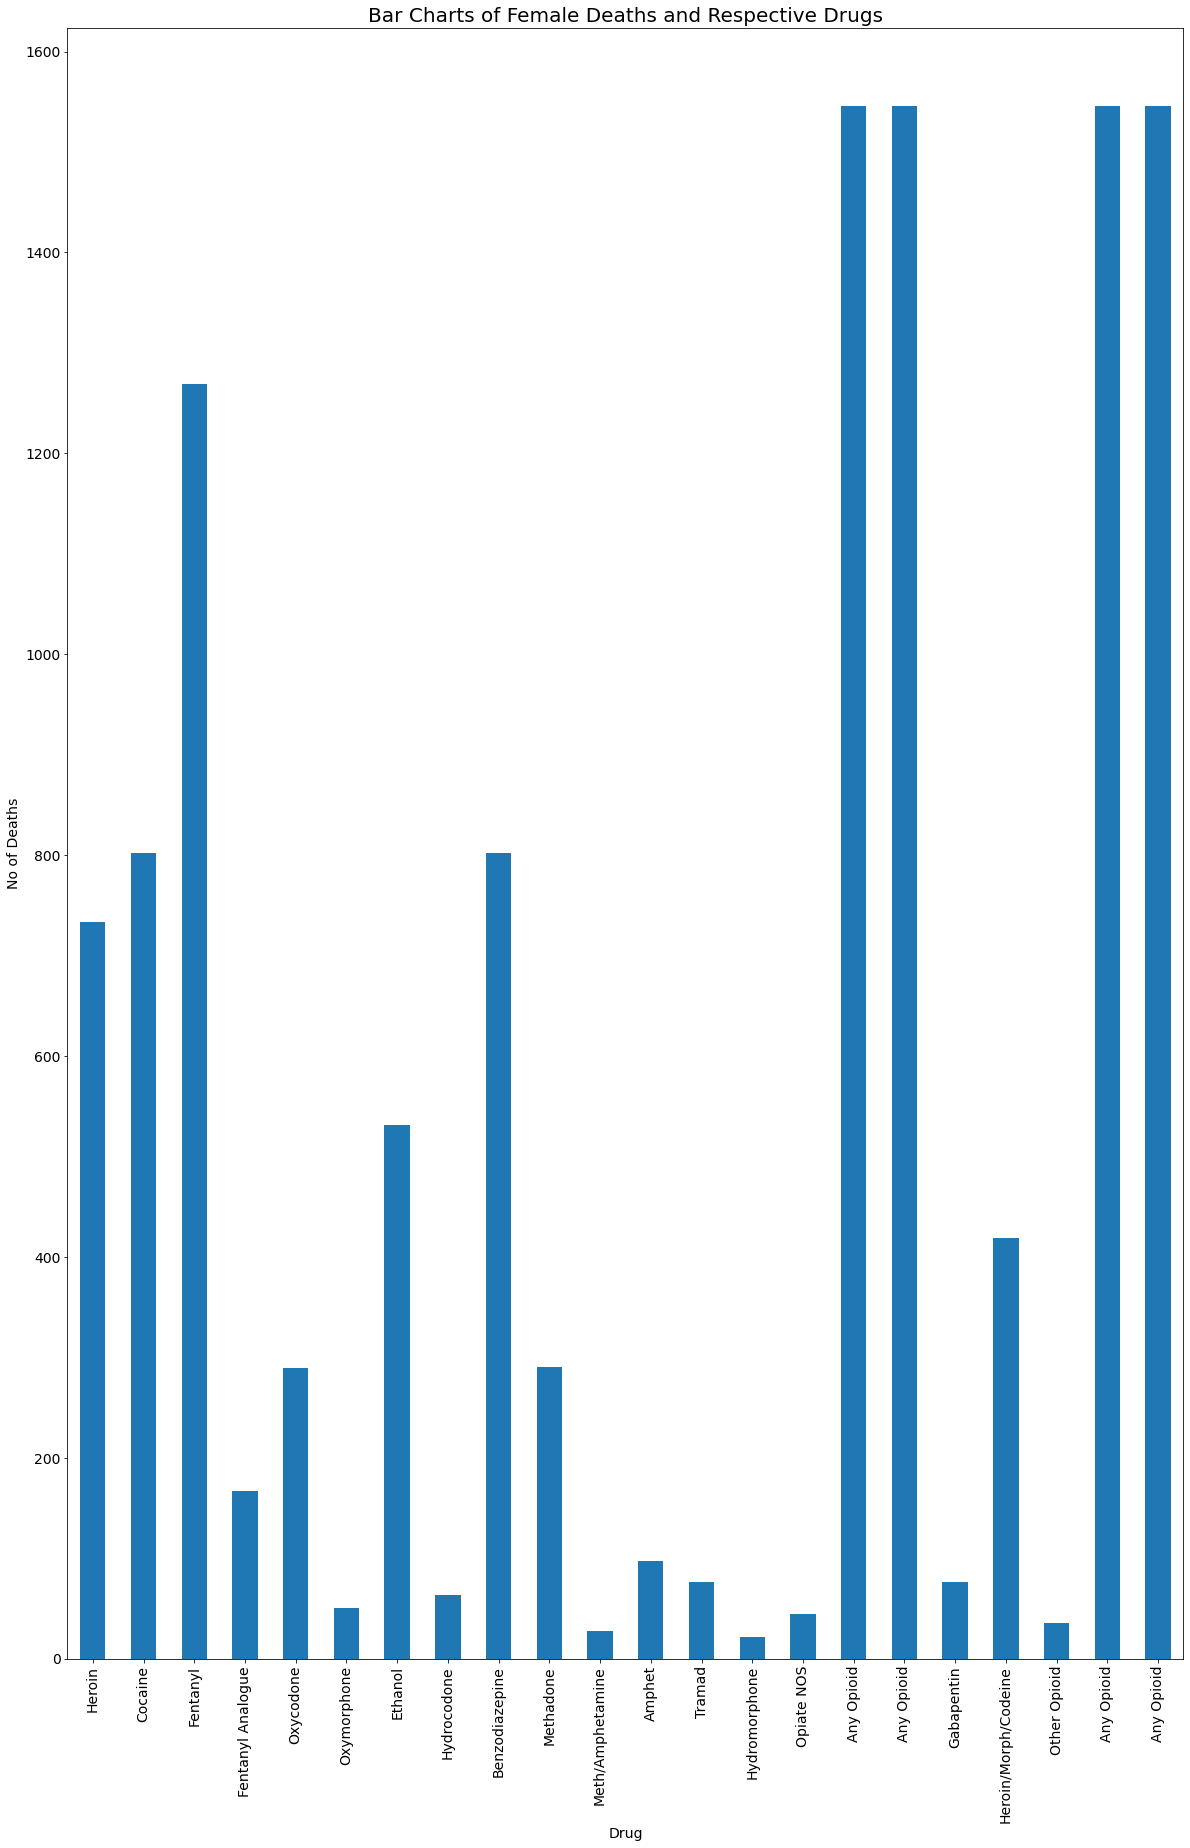

In [39]:
new_female.plot(kind='bar', fontsize = 14)

# add x and y axis labels
plt.xlabel('Drug', fontsize = 14)
plt.ylabel('No of Deaths', fontsize = 14)
plt.title("Bar Charts of Number of Female Deaths and Respective Drugs", fontsize = 20)

# show the plot
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Percentage of deceased with age Less than 17 :  0.081547064305685
Percentage of deceased with age 18-30 :  17.928704566635602
Percentage of deceased with age 30-45 :  37.18546132339236
Percentage of deceased with age 45-60 :  35.950605778191985
Percentage of deceased with age Over 60 :  8.853681267474371


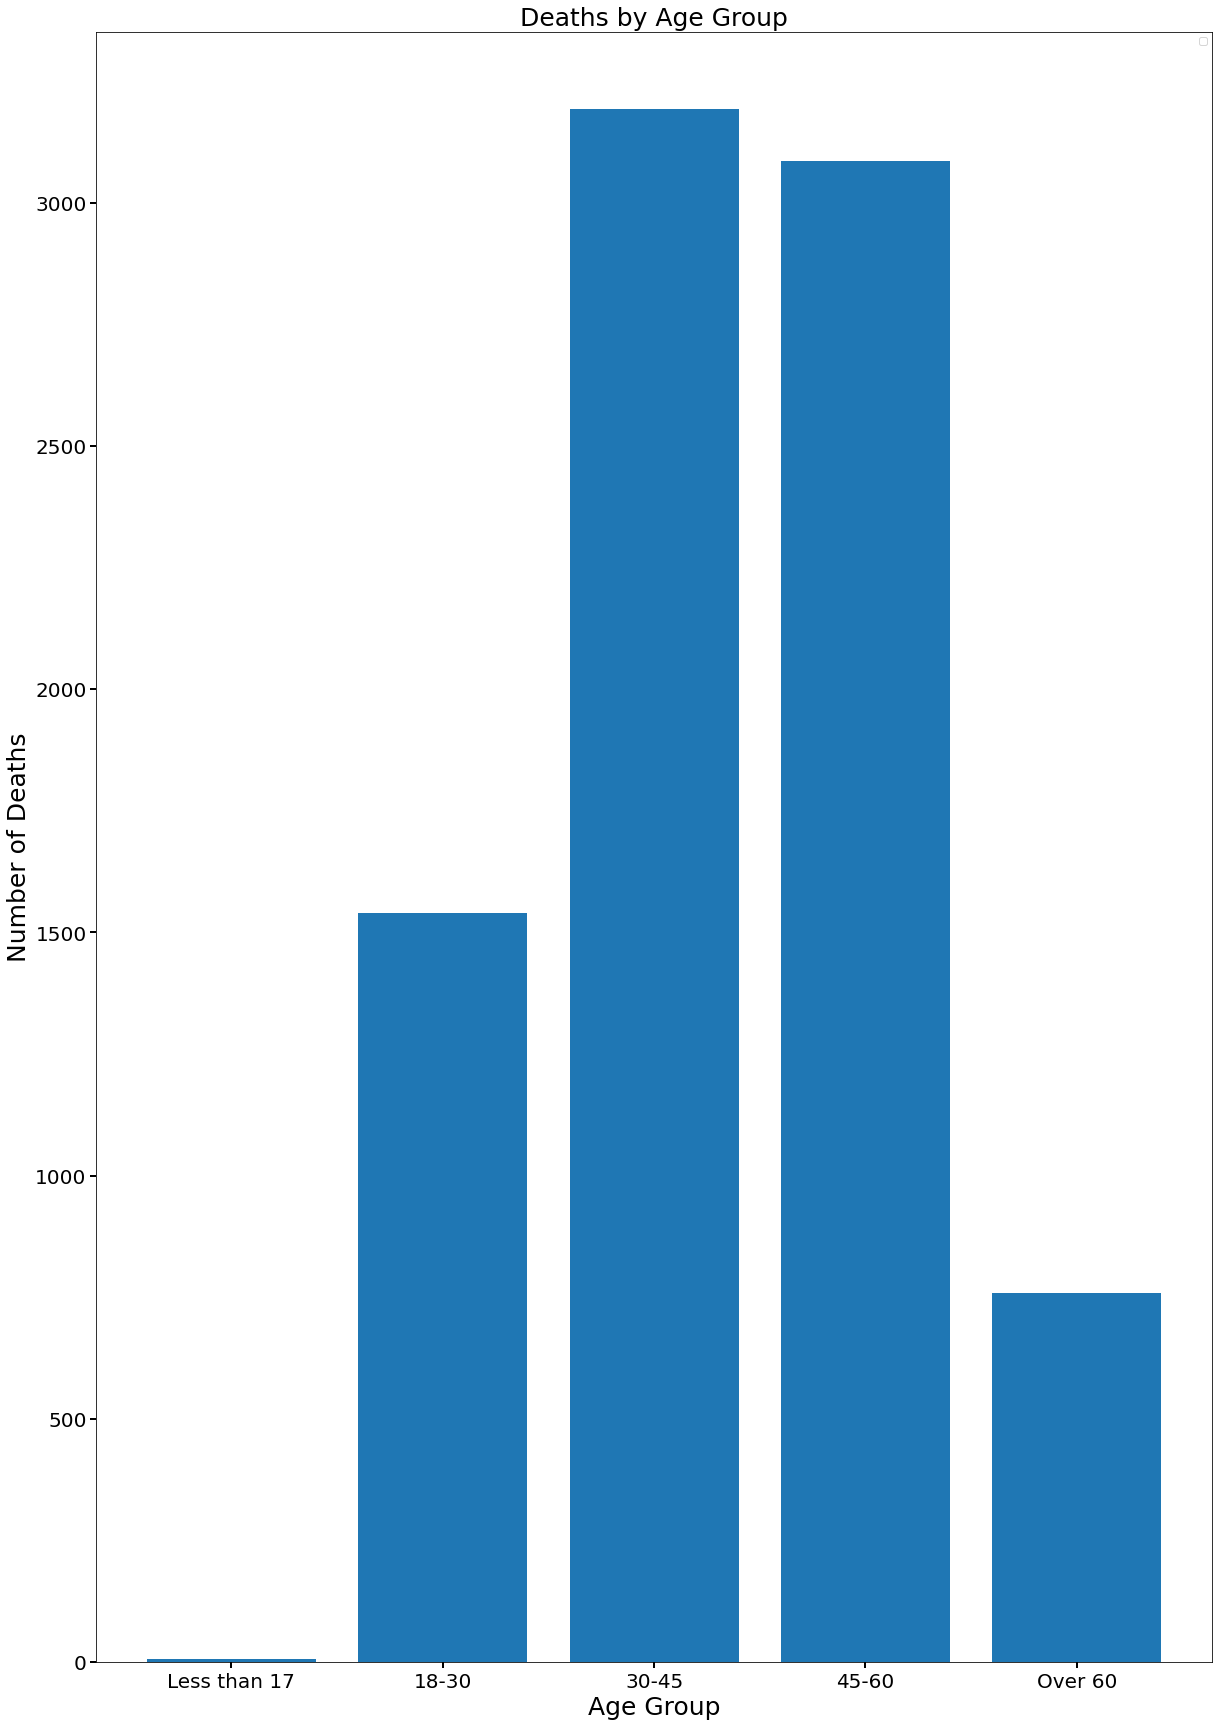

In [96]:
# data["Age"]
age_counts = {}
for i in range(len(data)):
    age = data["Age"][i]
    if age in age_counts.keys():
        age_counts[age] += 1
    else: 
        age_counts[age] = 1 
        
# print(age_counts)

less_than_17 = {'no_of_deaths': 0}
deaths_18_30 = {'no_of_deaths': 0}
deaths_30_45 = {'no_of_deaths': 0}
deaths_45_60 = {'no_of_deaths': 0}
over_60 = {'no_of_deaths': 0}
for keys,vals in age_counts.items():
    if keys < 17:
        less_than_17['no_of_deaths'] += vals
    if keys > 17 and keys < 30:
        deaths_18_30['no_of_deaths'] += vals
    if keys > 30 and keys < 45:
        deaths_30_45['no_of_deaths'] += vals
    if keys > 45 and keys < 60:
        deaths_45_60['no_of_deaths'] += vals
    if keys > 60:
        over_60['no_of_deaths'] += vals

# Get the keys and values for the combined dictionary
all_deaths = {"Less than 17": less_than_17['no_of_deaths'],
        "18-30": deaths_18_30['no_of_deaths'],
        "30-45": deaths_30_45['no_of_deaths'],
        "45-60": deaths_45_60['no_of_deaths'],
        "Over 60": over_60['no_of_deaths']}

labels = list(all_deaths.keys())
values = list(all_deaths.values())

total_deaths = sum(values)
# print("Total number of deaths: ", total_deaths)
# percentage deaths of each age group
for i in range(len(values)):
    print("Percentage of deceased with age", labels[i],": ",(values[i]/total_deaths)*100)


# print(labels, values)
# Create a bar plot
plt.bar(labels, values)
plt.xlabel("Age Group",fontsize = 25)
plt.ylabel("Number of Deaths", fontsize = 25)
plt.title("Deaths by Age Group", fontsize = 25)
plt.legend(loc='upper right')
plt.tick_params(axis='both', which='major', labelsize=20, length=6, width=2)
plt.show()

In [90]:
age_mean = data['Age'].mean()
age_std = data['Age'].std()

# print the results
print(f"The mean age is: {age_mean:.2f}")
print(f"The standard deviation of age is: {age_std:.2f}")

The mean age is: 43.02
The standard deviation of age is: 12.50


# Part 2
# Forming Clusters by the locations of deaths

The 'Death lat' and 'Death long' columns are used, and then the optimal number of clusters is found through the elbow method.

,Death lat,Death long


Number of points in the scatter plot: 9202


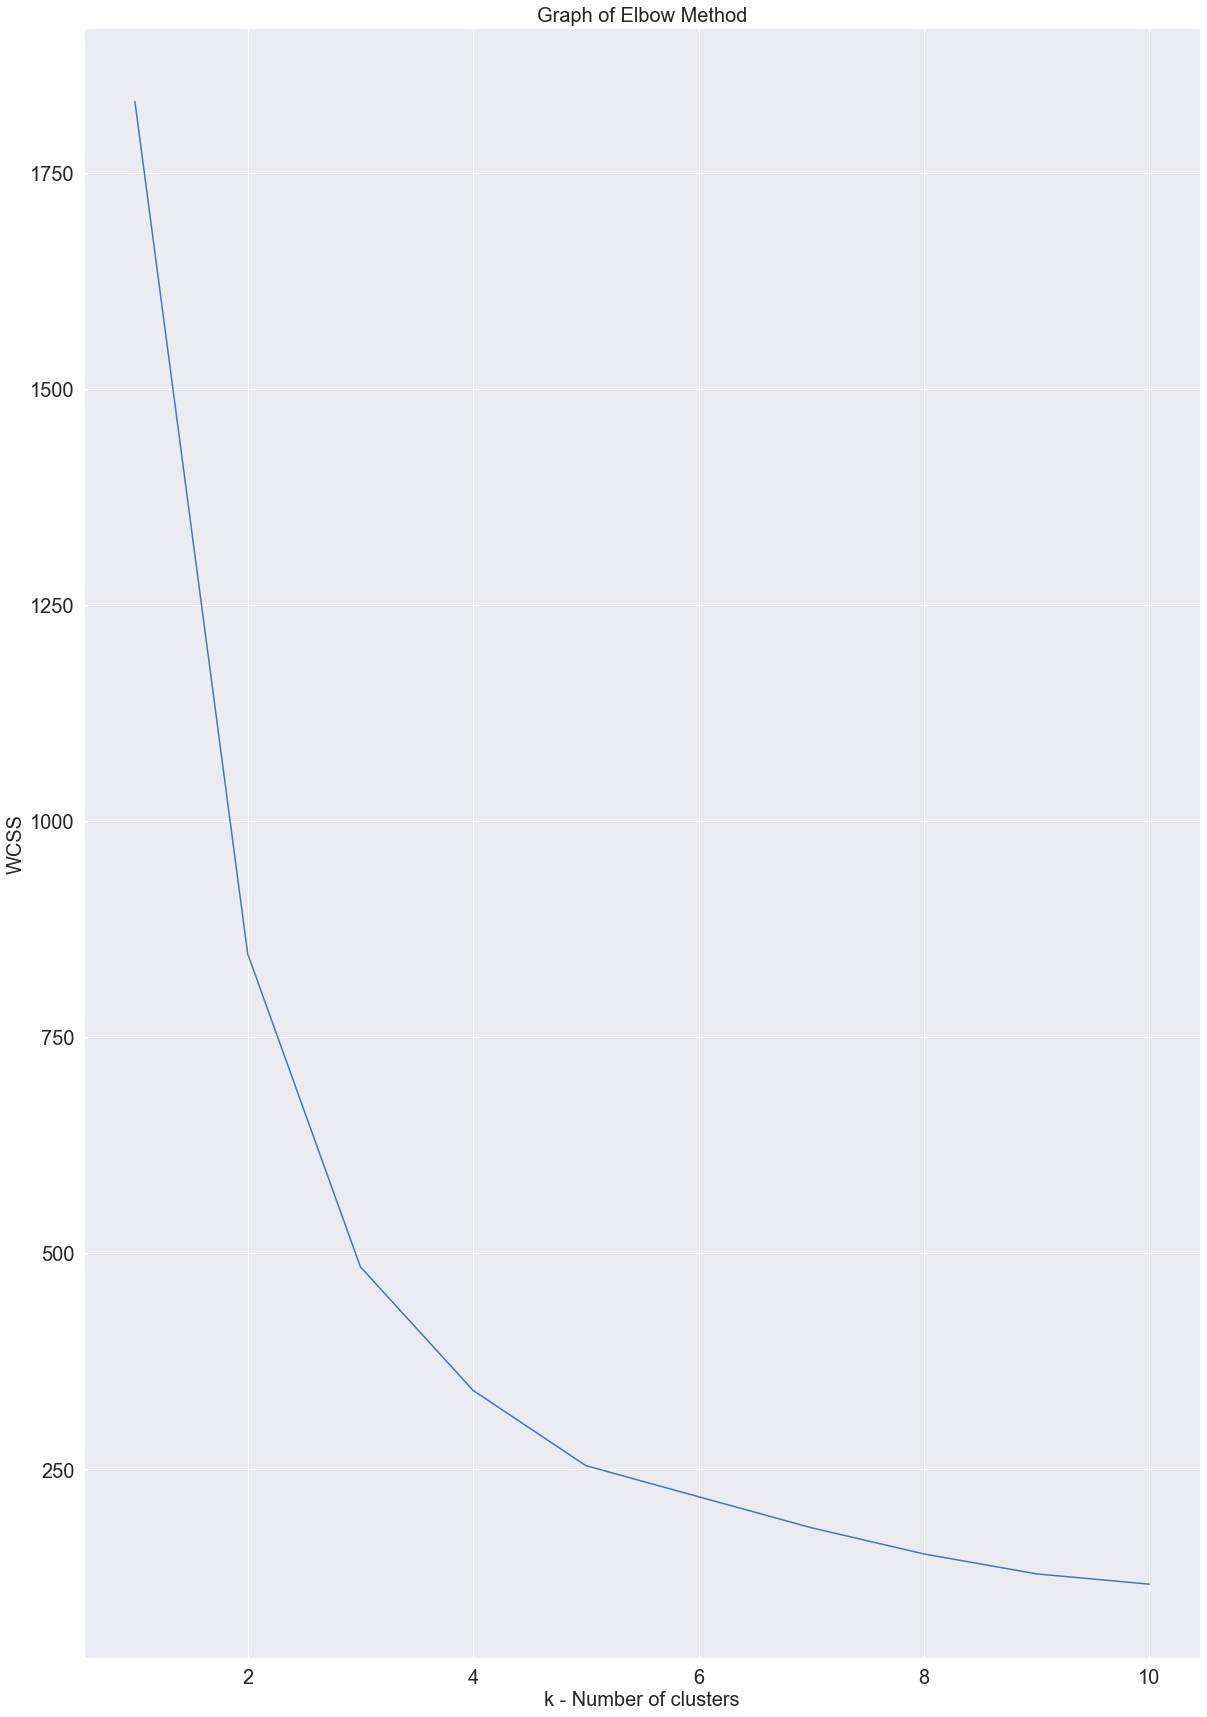

In [159]:
# display(data['Residence lat'].head(5))
# display(data['Residence long'].head(5))
from sklearn.cluster import KMeans

#Extracting only Latitudes and longitudes
X = data.loc[:,['Death lat', 'Death long']]
display(X[X.isnull().any(axis=1)])
X = X.dropna()
X = X.apply(pd.to_numeric, errors='coerce') 
X = np.array(X)

num_points = len(X[:,0])
print("Number of points in the scatter plot:", num_points)


#########################
wcss = [] ### for storing wcss number

for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=0, max_iter=300, n_init=10)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
#########################

plt.plot(range(1, 11), wcss)
plt.title('Graph of Elbow Method',fontsize=20)
plt.xlabel('k - Number of clusters',fontsize=20)
plt.ylabel('WCSS',fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.show()

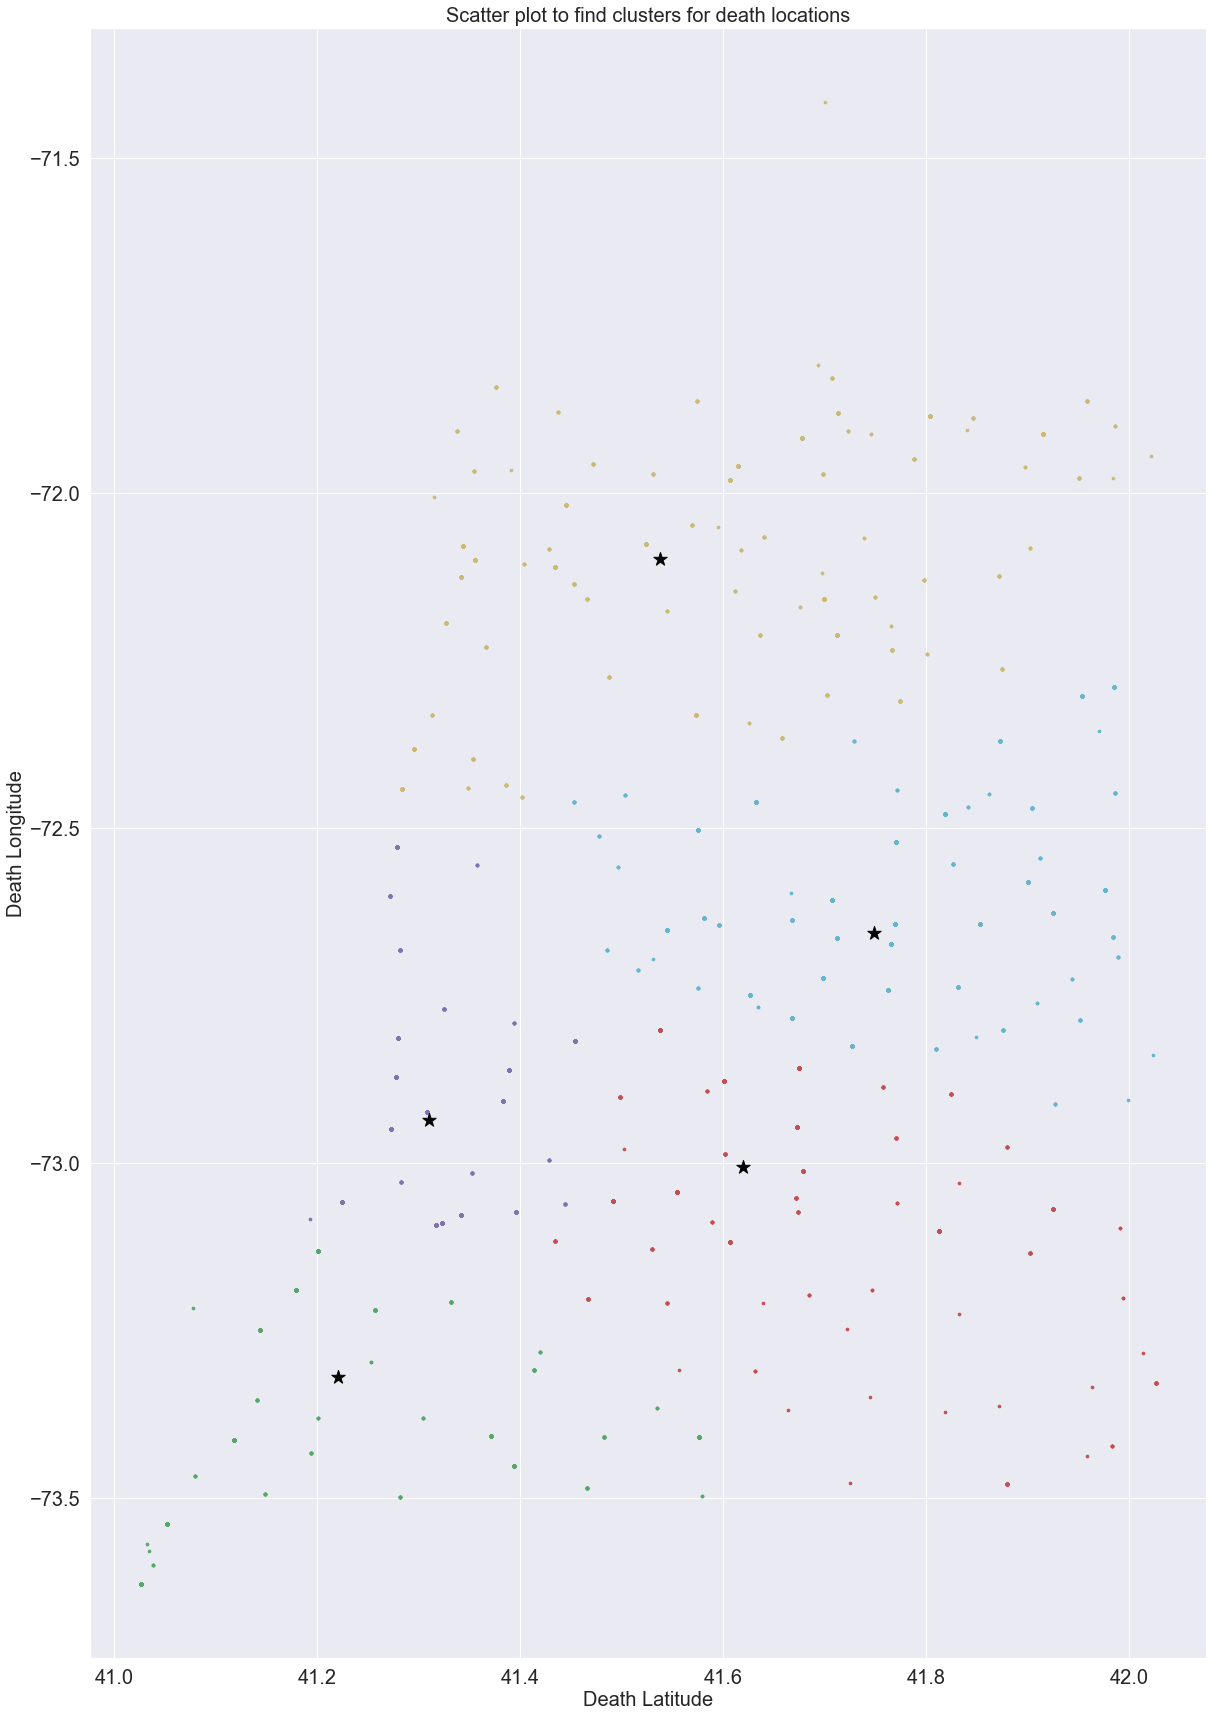

[[ 41.61994101 -73.0061955 ]
 [ 41.53749217 -72.09826249]
 [ 41.74903441 -72.65611163]
 [ 41.3106221  -72.93628101]
 [ 41.22102207 -73.31920686]]


In [160]:
kmeans = KMeans(n_clusters=5, random_state=0, max_iter=300, n_init=10).fit(X)
labels = kmeans.predict(X)


midpt = kmeans.cluster_centers_

colors = ['r', 'y', 'c', 'm' ,'g']

fig, ax = plt.subplots()
for i in range(k):
    points = np.array([X[j] for j in range(len(X)) if labels[j] == i])
    if len(points) == 0:
        continue
    ax.scatter(points[:, 0], points[:, 1], s=7, c=colors[i])
ax.scatter(midpt[:, 0], midpt[:, 1], marker='*', s=200, c='#050505')

plt.title("Scatter plot to find clusters for death locations", fontsize=20)
plt.xlabel('Death Latitude',fontsize=20)
plt.ylabel('Death Longitude', fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.show()

print(midpt)

Analysis: The Scatter plot shows that regardless of the formulation of clusters, the data is quite distributed throughout the locations due to which the fomring cluster and the analysing centre points of these clusters might not be an appropriate measure to deduce that deaths have a corleation with location.

Finding the names of the locations by Latitude and Longitude

> Deduction: These extracted locations are somewhat the 5 centre points of the clusters formulated, hence the deaths have occurred around these locations mainly

In [158]:
from geopy.geocoders import Nominatim

# Initialize geocoder
geolocator = Nominatim(user_agent="my-custom-application")

for i in range(len(midpt)):
    location = geolocator.reverse(f"{midpt[i][0]}, {midpt[i][1]}")
    print("\nLocation number",i, "is:")
    print(location.address)


Location number 0 is:
170, Andrews Road, Wolcott, Naugatuck Valley Planning Region, 06716, United States

Location number 1 is:
11, Turnpike Park, Yantic Falls Historic District, Norwichtown, Norwich, Southeastern Connecticut Planning Region, Connecticut, 06360, United States

Location number 2 is:
100, Reserve Road, Coltsville Historic District, Hartford, 06114, United States

Location number 3 is:
Dwight Street Historic District, Sherman Avenue, Dwight Street Historic District, New Haven, South Central Connecticut Planning Region, 06511, United States

Location number 4 is:
104, Mile Common, Aspetuck, Easton, Greater Bridgeport Planning Region, 06612, United States


# Frequent Pattern Mining

In [162]:
import mlxtend
from mlxtend.frequent_patterns import apriori, association_rules, fpgrowth, fpmax, fpcommon 
from mlxtend.preprocessing import TransactionEncoder

Dataset has been duplicated and all Y and Ns have been converted to 1 and 0 respectively

In [163]:
drug_df = my_data.loc[:, ['Heroin', 'Cocaine','Fentanyl','Fentanyl Analogue','Oxycodone','Oxymorphone','Ethanol','Hydrocodone','Benzodiazepine','Methadone','Meth/Amphetamine','Amphet','Tramad','Hydromorphone','Other','Opiate NOS','Any Opioid', 'Other', 'Gabapentin', 'Heroin/Morph/Codeine',
       'Other Opioid', 'Any Opioid']]
# print(drug_df.columns)

# get the column names where the value is 'Y'
present_cols = drug_df.columns[drug_df.eq('Y').any()]

# create a new DataFrame containing only the present columns
new_drug_df = drug_df[present_cols]
# new_drug_df = new_drug_df.fillna(0).replace('Y', 1).replace('N', 0)
new_drug_df = new_drug_df.fillna(0).replace(['Y', 'N', 'Y POPS', 'Y (PTCH)', 'nan', 'P'], [1, 0, 1, 1, 0, 0]).fillna(0)
print(new_drug_df.head())

   Heroin  Cocaine  Fentanyl  Fentanyl Analogue  Oxycodone  Oxymorphone  \
0       0        1         0                  0          0            0   
1       1        0         0                  0          0            0   
2       1        0         0                  0          0            0   
3       1        0         0                  0          0            0   
4       0        0         1                  0          0            0   

   Ethanol  Hydrocodone  Benzodiazepine  Methadone  ...  Tramad  \
0        0            0               0          0  ...       0   
1        0            0               0          0  ...       0   
2        0            0               0          0  ...       0   
3        0            0               0          0  ...       0   
4        0            0               0          0  ...       0   

   Hydromorphone  Opiate NOS  Any Opioid  Any Opioid  Gabapentin  \
0              0           0           0           0           0   
1         

Running apriori algorithm to find frequent itemsets

In [164]:
def visualize_frequent_itemsets(frequent_itemsets):
    fig, ax = plt.subplots()
    # Define the colors for the bars
    colors = ['orange' if support < 0.4 else 'blue' for support in frequent_itemsets['support']]
    ax.barh(range(len(frequent_itemsets)), frequent_itemsets['support'], align='center', color=colors)
    ax.set_yticks(range(len(frequent_itemsets)))
    ax.set_yticklabels([', '.join(items) for items in frequent_itemsets['itemsets']], fontsize=20)
    ax.invert_yaxis()
    ax.set_xlabel('Support', fontsize=20)
    ax.set_title('Frequent Itemsets', fontsize = 20)
    plt.tight_layout()
    plt.show()

# perform frequent itemset mining using the apriori algorithm
frequent_itemsets = apriori(new_drug_df, min_support=0.2, use_colnames=True)

# generate association rules
rules = association_rules(frequent_itemsets, metric='confidence', min_threshold=0.7)

print("\nAssociation Rules:")
print(rules[['antecedents', 'consequents', 'confidence']])


Association Rules:
                          antecedents             consequents  confidence
0              (Heroin/Morph/Codeine)                (Heroin)    0.948770
1                        (Any Opioid)              (Fentanyl)    0.775227
2                          (Fentanyl)            (Any Opioid)    0.857370
3              (Heroin/Morph/Codeine)            (Any Opioid)    0.996414
4                (Heroin, Any Opioid)  (Heroin/Morph/Codeine)    0.875473
5  (Any Opioid, Heroin/Morph/Codeine)                (Heroin)    0.950643
6      (Heroin, Heroin/Morph/Codeine)            (Any Opioid)    0.998380
7              (Heroin/Morph/Codeine)    (Heroin, Any Opioid)    0.947234
8               (Cocaine, Any Opioid)              (Fentanyl)    0.854898
9                 (Cocaine, Fentanyl)            (Any Opioid)    0.879696


/Users/mustafa/Library/Python/3.10/lib/python/site-packages/mlxtend/frequent_patterns/fpcommon.py:110: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


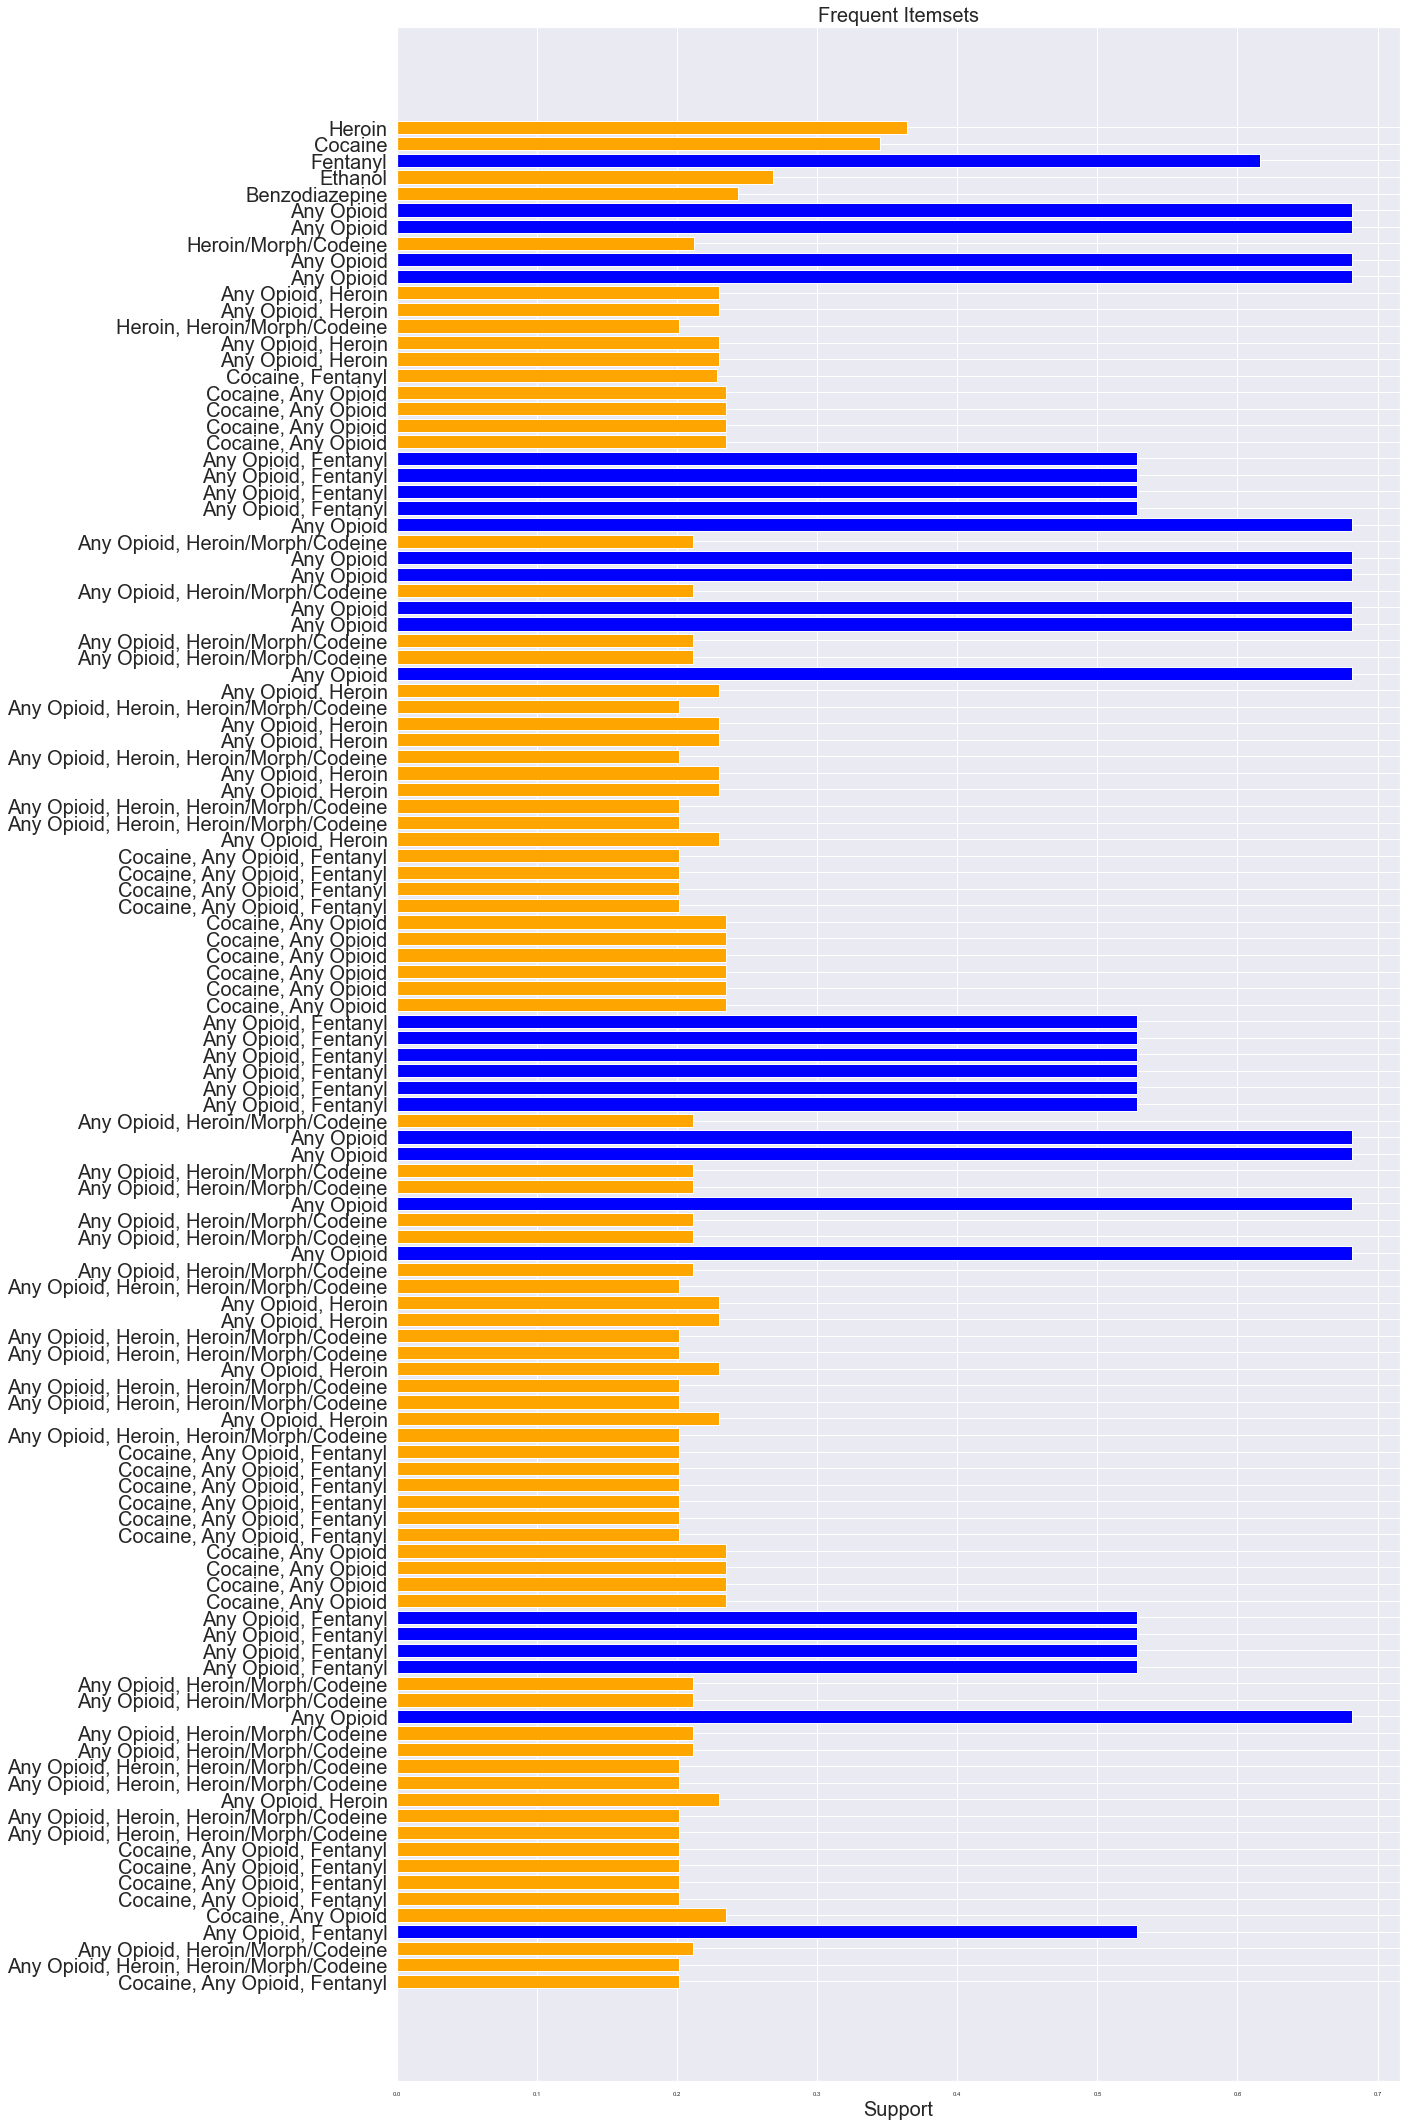

In [165]:
visualize_frequent_itemsets(frequent_itemsets)